<!DOCTYPE html>
<html>
  <style>
    body {
      font-family: Arial, sans-serif;
      line-height: 1.6;
    }
    h1 {
      color: #333;
    }
    p {
      color: #666;
    }
  </style>
</head>
<body>

<h1>Dropout Count Prediction Project by Group 2</h1>

<h3>Introduction</h3>
<p>In this project, we aim to analyze and predict educational outcomes, particularly focusing on dropout rates and other relevant metrics. The project involves the application of various machine learning techniques to understand the factors influencing educational outcomes and develop predictive models to identify at-risk students.</p>

<p><strong>Project Objectives:</strong></p>
<ul>
  <li>Explore the dataset related to student enrollment, graduation, dropout rates, and other educational metrics.</li>
  <li>Preprocess the data to handle missing values, encode categorical variables, and prepare it for modeling.</li>
  <li>Perform exploratory data analysis (EDA) to gain insights into the relationships between different features and educational outcomes.</li>
  <li>Select appropriate features and build predictive models using techniques such as Poisson regression, Negative Binomial regression, and multiple linear regression.</li>
  <li>Evaluate the performance of the models and interpret the results to understand the factors influencing educational outcomes.</li>
  
</ul>

<p><strong>Dataset:</strong> The dataset contains information on student enrollment, graduation counts, dropout counts, and other educational metrics. It also includes demographic information such as county codes, subgroup codes, and other relevant features.</p>

<p>Let's begin by exploring the dataset and preparing it for analysis.</p>

</body>
</html>


Below mentioned are the steps that were performed for this project: 

1. Introduction:
2. EDA
3. Data Preparation
4. Prepped Data Review
5. Regression model and Evaluation
6. Model Selection
7. Conclusion

We conducted exploratory data analysis (EDA), prepared the data, and reviewed each feature of the dataset collectively. We applied two different transformations: a log scale transformation and a standard scale transformation. Using these, we developed two sets of models—one based on the log-transformed data and the other on the standard-scaled data.

In [117]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plot style for publication-quality visuals
plt.style.use('seaborn-whitegrid')


In [118]:
# Reading the data from the provided GitHub link
data_url = "https://raw.githubusercontent.com/Niyanta5/NumpyDataSet/refs/heads/main/Project1_Data%20(1).csv"
df = pd.read_csv(data_url)


### Exploratory Data Analysis(EDA) & Data Preparation

In [119]:
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


In [120]:
df.shape #checking the shape of the dataset

(73152, 29)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

In [122]:
df[df.dropout_cnt=='-'].head() #checking the rows which having '-' values

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
8,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
13,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
16,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
17,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-


In [123]:
# Replace all occurrences of the string '-' in the DataFrame with NaN values for better data handling
df.replace('-', np.nan, inplace=True)

In [124]:
# Count the number of null values in each column of the DataFrame
# where the 'dropout_cnt' column is null.
df.isnull().sum()

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                 

In [125]:
# Filter the DataFrame to include only rows where 'dropout_cnt' is null
null_counts = df[df.dropout_cnt.isnull()].isnull().sum()

In [126]:
df2 = df[['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']]
df2[df2.dropout_cnt.isnull()].isnull().sum()

enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      33478
local_cnt                     33478
local_pct                     33478
reg_cnt                       33478
reg_pct                       33478
reg_adv_cnt                   33478
reg_adv_pct                   33478
non_diploma_credential_cnt    33478
non_diploma_credential_pct    33478
still_enr_cnt                 33478
still_enr_pct                 33478
ged_cnt                       33478
ged_pct                       33478
dropout_cnt                   33478
dropout_pct                   33478
dtype: int64

In [127]:
# Remove any rows with missing values from df
df.dropna(inplace=True)

In [128]:
df.report_school_year.unique()

array(['2018-19'], dtype=object)

In [129]:
# Drop the 'report_school_year' column from the DataFrame, as it's likely redundant or not needed for the analysis
df.drop('report_school_year', axis=1, inplace=True)

In [130]:
df.aggregation_index.unique()

array([3])

In [131]:
# Drop the 'aggregation_index' column from the DataFrame, as it may not be needed for the analysis or modeling
df.drop('aggregation_index', axis=1, inplace=True)

In [132]:
df[['aggregation_type', 'aggregation_name']]

,aggregation_type,aggregation_name
0,District,ALBANY CITY SCHOOL DISTRICT
1,District,ALBANY CITY SCHOOL DISTRICT
2,District,ALBANY CITY SCHOOL DISTRICT
4,District,ALBANY CITY SCHOOL DISTRICT
5,District,ALBANY CITY SCHOOL DISTRICT
...,...,...
73138,District,DUNDEE CENTRAL SCHOOL DISTRICT
73142,District,DUNDEE CENTRAL SCHOOL DISTRICT
73143,District,DUNDEE CENTRAL SCHOOL DISTRICT
73145,District,DUNDEE CENTRAL SCHOOL DISTRICT


In [133]:
df.aggregation_type.unique()

array(['District'], dtype=object)

In [134]:
# The column likely contains only the value 'District', so it may not provide useful information for modeling and is being dropped
df.drop('aggregation_type', axis=1, inplace=True)

In [135]:
len(df.aggregation_name.unique()) #check the length of the column values

677

In [136]:
df[['nrc_code', 'nrc_desc','nyc_ind']].value_counts()

nrc_code  nrc_desc                               nyc_ind
5         Average Needs                          0          18260
6         Low Needs                              0           7136
4         Rural High Needs                       0           7048
3         Urban-Suburban High Needs              0           3412
1         NYC                                    1           3382
2         Buffalo  Rochester  Yonkers  Syracuse  0            436
Name: count, dtype: int64

In [137]:
# Drop the 'nrc_code' and 'nyc_ind' columns as they might represent categorical information (e.g., district types and NYC indicator)
df.drop(['nrc_code', 'nyc_ind'], axis=1, inplace=True)

In [138]:
# Count unique 'county_code' and 'county_name' pairs and sort by 'county_code'
df[['county_code', 'county_name']].value_counts().reset_index().sort_values(by='county_code')

,county_code,county_name,count
12,1,ALBANY,738
30,2,ALLEGANY,462
13,3,BROOME,734
25,4,CATTARAUGUS,552
42,5,CAYUGA,336
...,...,...,...
34,64,WASHINGTON,418
20,65,WAYNE,612
2,66,WESTCHESTER,2700
57,67,WYOMING,174


In [139]:
# Drop the 'county_code' column since the 'county_name' likely provides sufficient information for analysis
df.drop('county_code', axis=1, inplace=True)

In [140]:
df.membership_desc.unique()

array(['2013 Total Cohort - 6 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome',
       '2015 Total Cohort - 4 Year Outcome',
       '2014 Total Cohort - 5 Year Outcome - August 2019',
       '2015 Total Cohort - 4 Year Outcome - August 2019',
       '2013 Total Cohort - 6 Year Outcome - August 2019'], dtype=object)

In [141]:
# Count unique 'subgroup_code' and 'subgroup_name' pairs and sort by 'subgroup_code
df[['subgroup_code','subgroup_name']].value_counts().reset_index().sort_values(by='subgroup_code')

,subgroup_code,subgroup_name,count
0,1,All Students,4046
2,2,Female,3970
1,3,Male,3970
17,4,American Indian/Alaska Native,270
9,5,Black,1416
8,6,Hispanic,1878
10,7,Asian/Pacific Islander,1122
7,8,White,2790
15,9,Multiracial,708
5,10,General Education Students,3632


In [142]:
# Drop the 'subgroup_code' column since the 'subgroup_name' likely provides sufficient information for analysis
df.drop('subgroup_code', axis=1, inplace=True)

In [143]:
# To identify datatypes of the selected columns
df[['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 39674 entries, 0 to 73146
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   enroll_cnt                  39674 non-null  object
 1   grad_cnt                    39674 non-null  object
 2   grad_pct                    39674 non-null  object
 3   local_cnt                   39674 non-null  object
 4   local_pct                   39674 non-null  object
 5   reg_cnt                     39674 non-null  object
 6   reg_pct                     39674 non-null  object
 7   reg_adv_cnt                 39674 non-null  object
 8   reg_adv_pct                 39674 non-null  object
 9   non_diploma_credential_cnt  39674 non-null  object
 10  non_diploma_credential_pct  39674 non-null  object
 11  still_enr_cnt               39674 non-null  object
 12  still_enr_pct               39674 non-null  object
 13  ged_cnt                     39674 non-null  object


In [144]:
df[['enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct']].head()

,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,reg_cnt,reg_pct,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,658,464,71%,63,10%,310,47%,91,14%,16,2%,30,5%,0,0%,148,22%
1,324,246,76%,30,9%,169,52%,47,15%,2,1%,11,3%,0,0%,65,20%
2,334,218,65%,33,10%,141,42%,44,13%,14,4%,19,6%,0,0%,83,25%
4,367,248,68%,42,11%,183,50%,23,6%,10,3%,18,5%,0,0%,91,25%
5,98,58,59%,13,13%,40,41%,5,5%,4,4%,8,8%,0,0%,28,29%


#### Enrollment and Graduation Metrics Calculation

The following calculations derive various percentages related to enrollment and graduation metrics based on the counts of students in different categories.

- **grad_pct**: Percentage of graduates out of total enrollments.
- **local_pct**: Percentage of local graduates out of total enrollments.
- **reg_pct**: Percentage of regular graduates out of total enrollments.
- **reg_adv_pct**: Percentage of regular advanced graduates out of total enrollments.
- **non_diploma_credential_pct**: Percentage of students receiving non-diploma credentials out of total enrollments.
- **still_enr_pct**: Percentage of students still enrolled out of total enrollments.
- **ged_pct**: Percentage of students receiving a GED out of total enrollments.
- **dropout_pct**: Percentage of dropouts out of total enrollments.

```python
# grad_pct = grad_cnt/enroll_cnt
# local_pct = local_cnt/enroll_cnt
# reg_pct = reg_cnt/enroll_cnt
# reg_adv_pct = reg_adv_cnt/enroll_cnt
# non_diploma_credential_pct = non_diploma_credential_cnt/enroll_cnt
# still_enr_pct = still_enr_cnt/enroll_cnt
# ged_pct = ged_cnt/enroll_cnt
# dropout_pct = dropout_cnt/enroll_cnt


In [145]:
# Remove all the percentage columns as they can be derived from the existing columns if needed.
df.drop(['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct',
       'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct'], axis=1, inplace=True)

In [146]:
df.columns

Index(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt',
       'dropout_cnt', 'dropout_pct'],
      dtype='object')

In [147]:
# Convert the specified count columns in the DataFrame to integer type.
df[['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']] = df[['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']].astype(int)

In [148]:
# Remove the % symbol from dropout_pct and convert to float type.
df['dropout_pct'] = df['dropout_pct'].str.strip('%').astype(float)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39674 entries, 0 to 73146
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   aggregation_name            39674 non-null  object 
 1   nrc_desc                    39674 non-null  object 
 2   county_name                 39674 non-null  object 
 3   membership_desc             39674 non-null  object 
 4   subgroup_name               39674 non-null  object 
 5   enroll_cnt                  39674 non-null  int64  
 6   grad_cnt                    39674 non-null  int64  
 7   local_cnt                   39674 non-null  int64  
 8   reg_cnt                     39674 non-null  int64  
 9   reg_adv_cnt                 39674 non-null  int64  
 10  non_diploma_credential_cnt  39674 non-null  int64  
 11  still_enr_cnt               39674 non-null  int64  
 12  ged_cnt                     39674 non-null  int64  
 13  dropout_cnt                 39674 no

#### EDA on Categorical Columns

In [150]:
cat_col = ['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc','subgroup_name']

In [151]:
# Print the number of unique values for each categorical column
for i in cat_col:
  print(f'number of unique values in {i} : {len(df[i].unique())}')
  print('\n')

number of unique values in aggregation_name : 677


number of unique values in nrc_desc : 6


number of unique values in county_name : 62


number of unique values in membership_desc : 6


number of unique values in subgroup_name : 24




In [152]:
# Count unique combinations of 'nrc_desc' and 'membership_desc'
df[['nrc_desc','membership_desc']].value_counts()

nrc_desc                               membership_desc                                 
Average Needs                          2015 Total Cohort - 4 Year Outcome                  3079
                                       2015 Total Cohort - 4 Year Outcome - August 2019    3079
                                       2014 Total Cohort - 5 Year Outcome                  3043
                                       2014 Total Cohort - 5 Year Outcome - August 2019    3043
                                       2013 Total Cohort - 6 Year Outcome                  3008
                                       2013 Total Cohort - 6 Year Outcome - August 2019    3008
Low Needs                              2015 Total Cohort - 4 Year Outcome - August 2019    1211
                                       2015 Total Cohort - 4 Year Outcome                  1211
Rural High Needs                       2014 Total Cohort - 5 Year Outcome                  1193
                                       2014 Tota

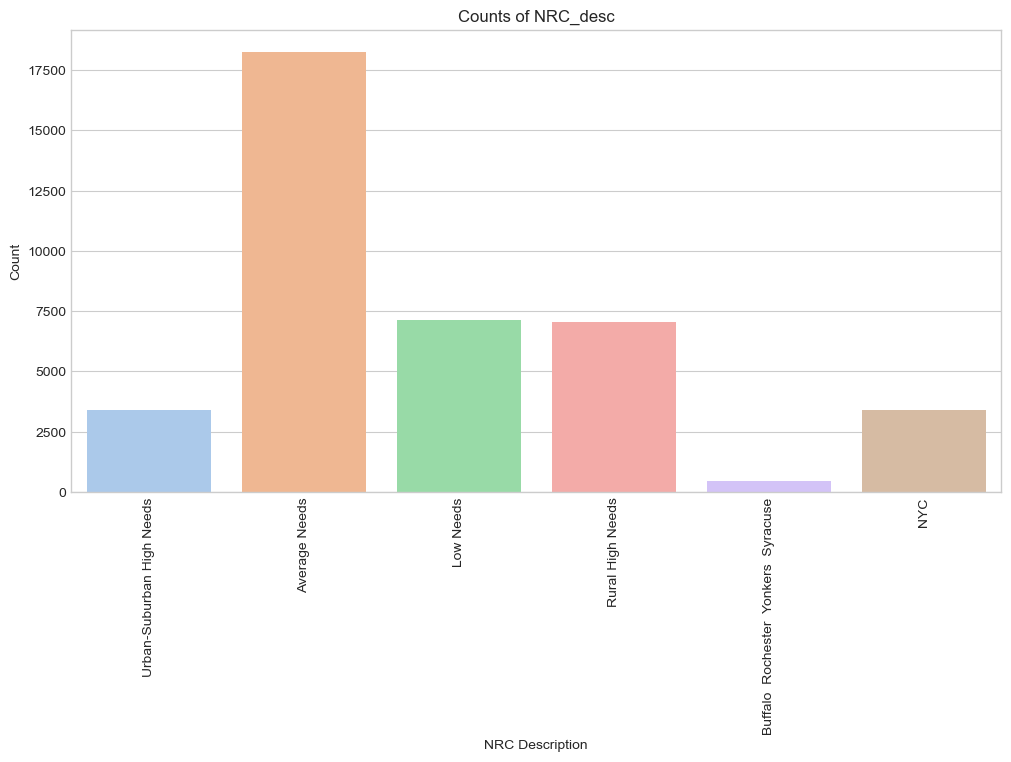

In [153]:
# Plot the counts of each NRC description using a count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='nrc_desc', palette='pastel')
plt.title('Counts of NRC_desc')
plt.xlabel('NRC Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

### Explanation

This bar plot shows the count of records for each NRC (Needs Resource Capacity) description category. Key insights:

- **Average Needs** has the highest count, with over 17,500 records.
- **Low Needs** and **Rural High Needs** are the next largest categories.
- **Urban-Suburban High Needs** and **NYC** have moderate counts.
- **Buffalo, Rochester, Yonkers, Syracuse** have the lowest counts.

The graph highlights the dominance of Average Needs in the dataset.

In [154]:
df.shape

(39674, 15)

In [155]:
cnt = df.groupby(by = i)['dropout_cnt'].count()/df.shape[0]*100
cnt = cnt.reset_index()

In [156]:
# Utitlity function to calculate dropout statistics (enroll_cnt, dropout_cnt, dropout_rate, mean_dropout_pct, and count_percent) for a specified categorical column 'i'.
def dropout_cat(i, df = df):
  df1 = df.groupby(by = i)[['enroll_cnt', 'dropout_cnt']].sum().reset_index()
  df1['dropout_rate'] = (df1['dropout_cnt']/df1['enroll_cnt'])*100
  df1.sort_values(by='dropout_rate', ascending=False, inplace=True)
  con = df.groupby(by = i)['dropout_pct'].mean().reset_index()
  cnt = df.groupby(by = i)['dropout_cnt'].count()/df.shape[0]*100
  cnt = cnt.reset_index()
  cnt.rename(columns={'dropout_cnt':'count_percent'}, inplace=True)
  df1 = pd.merge(df1, con, on= i , how='inner')
  df1 = pd.merge(df1, cnt, on= i , how='inner')
  df1.rename(columns={'dropout_pct':'mean_dropout_pct'}, inplace=True)
  return df1

In [157]:
dropout_cat('nrc_desc')

,nrc_desc,enroll_cnt,dropout_cnt,dropout_rate,mean_dropout_pct,count_percent
0,Buffalo Rochester Yonkers Syracuse,347250,59880,17.244060,17.454128,1.098956
1,Urban-Suburban High Needs,661282,95921,14.505309,15.660023,8.600091
2,NYC,3125380,339987,10.878261,13.167357,8.524474
3,Rural High Needs,343374,30944,9.011748,9.319949,17.764783
4,Average Needs,2093648,102917,4.915678,6.831818,46.025105
5,Low Needs,1051238,14626,1.391312,2.790919,17.986591


### Replace the nrc_desc row values that have less then 10% dropout_rate with Other_nrc_desc

In [158]:
dropout_cat('nrc_desc').nrc_desc.unique()

array(['Buffalo  Rochester  Yonkers  Syracuse',
       'Urban-Suburban High Needs', 'NYC', 'Rural High Needs',
       'Average Needs', 'Low Needs'], dtype=object)

In [159]:
# Replace the nrc_desc row values that have less then 10% dropout_rate with Other_nrc_desc
df.nrc_desc.replace(['Rural High Needs',
       'Average Needs', 'Low Needs'], 'Other_nrc_desc', inplace=True)

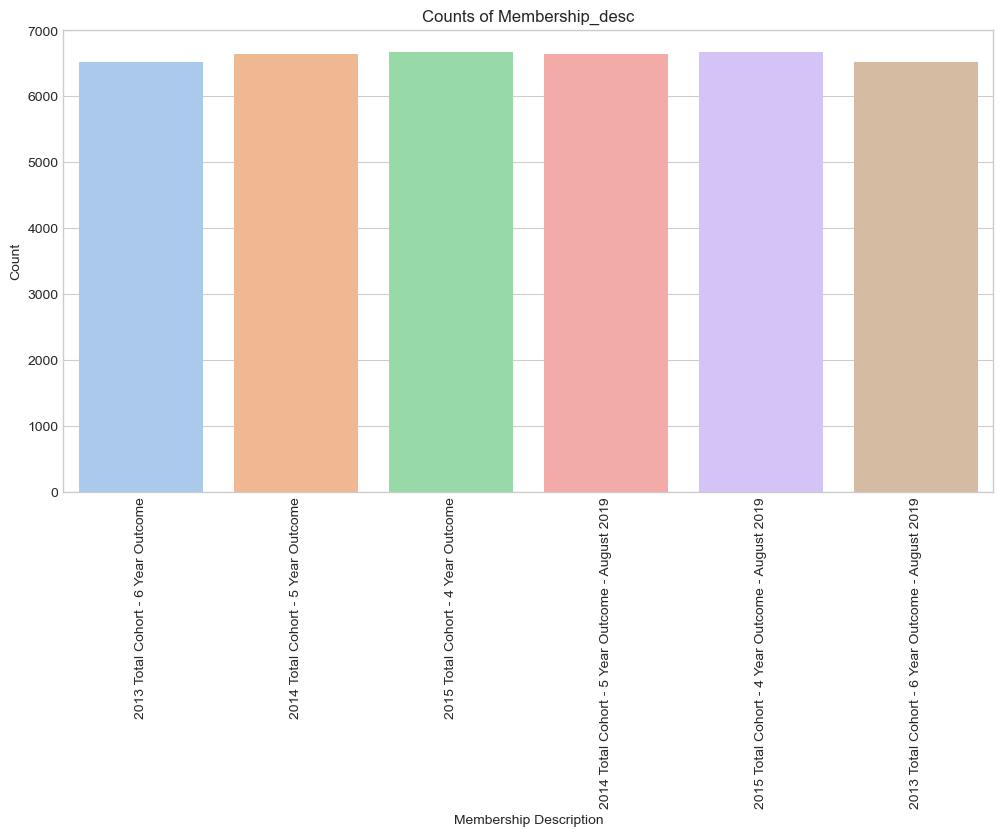

In [160]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='membership_desc', palette='pastel')
plt.title('Counts of Membership_desc')
plt.xlabel('Membership Description')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show();

#### Explanation

This bar plot displays the count of records for different **Membership_desc** categories. Key insights:

- All categories have similar counts, ranging just below 7,000 records.
- The categories represent different cohort outcomes from 2013 to 2015, covering 4-year, 5-year, and 6-year outcomes.
- There is no significant variation in the number of records across the different cohort and year combinations.

The graph suggests a consistent distribution of membership descriptions across the cohorts and outcomes.

In [161]:
dropout_cat('membership_desc')

,membership_desc,enroll_cnt,dropout_cnt,dropout_rate,mean_dropout_pct,count_percent
0,2013 Total Cohort - 6 Year Outcome,1255191,122700,9.775405,8.793283,16.436457
1,2013 Total Cohort - 6 Year Outcome - August 2019,1255191,122424,9.753416,8.788376,16.436457
2,2014 Total Cohort - 5 Year Outcome,1281479,117387,9.160275,8.410994,16.736402
3,2014 Total Cohort - 5 Year Outcome - August 2019,1281479,116412,9.084191,8.387651,16.736402
4,2015 Total Cohort - 4 Year Outcome,1274416,82860,6.501802,6.725884,16.827141
5,2015 Total Cohort - 4 Year Outcome - August 2019,1274416,82492,6.472926,6.715249,16.827141


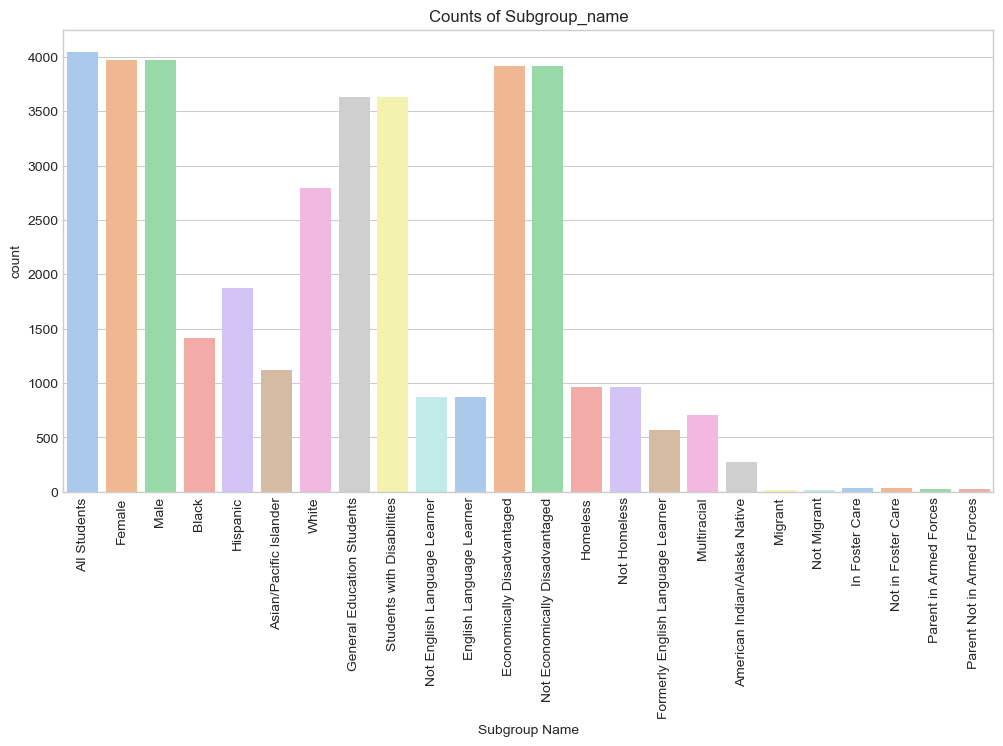

In [162]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='subgroup_name', palette='pastel')
plt.title('Counts of Subgroup_name')
plt.xlabel('Subgroup Name')
plt.xticks(rotation=90)
plt.show();

#### Explanation

This bar plot shows the count of records for various **Subgroup_name** categories. Key insights:

- **All Students**, **Female**, and **Male** subgroups have the highest counts, all around 4,000 records.
- **General Education Students**, **White**, and **Economically Disadvantaged** subgroups also have large counts.
- **Hispanic**, **Black**, **Students with Disabilities**, and **English Language Learner** subgroups have moderate representation.
- Other subgroups, like **Migrant**, **In Foster Care**, and **Parent in Armed Forces**, have very low counts.

The plot highlights the diversity in representation across different subgroups.

In [163]:
# Generate dropout statistics by subgroup and display the results
dfsub = dropout_cat('subgroup_name')
dfsub

,subgroup_name,enroll_cnt,dropout_cnt,dropout_rate,mean_dropout_pct,count_percent
0,Migrant,96,38,39.583333,39.555556,0.045370
1,English Language Learner,61304,22580,36.832833,35.178899,2.197913
2,In Foster Care,264,62,23.484848,19.555556,0.090740
3,Homeless,41606,9494,22.818824,21.134096,2.424762
4,Not in Foster Care,29150,4897,16.799314,12.388889,0.090740
5,American Indian/Alaska Native,5702,875,15.345493,14.370370,0.680546
6,Not Migrant,8494,1289,15.175418,12.444444,0.045370
7,Students with Disabilities,191704,27819,14.511434,11.930066,9.154610
8,Hispanic,286010,39663,13.867697,10.126731,4.733579
9,Black,201016,23149,11.515999,8.076271,3.569088


In [164]:
# Identify subgroup names with a dropout rate of less than 10
replace_sub = dfsub[dfsub.dropout_rate < 10].subgroup_name.unique()

In [165]:
# Replace subgroup names with 'Other_subgroup_name' for those with a dropout rate of less than 10%
df.subgroup_name.replace(replace_sub, 'Other_subgroup_name', inplace=True)

In [166]:
# Count and sort the frequency of each county name in descending order
df.county_name.value_counts().sort_values(ascending=False).reset_index()

,county_name,count
0,SUFFOLK,3996
1,NASSAU,3152
2,WESTCHESTER,2700
3,ERIE,1770
4,MONROE,1356
...,...,...
57,WYOMING,174
58,RICHMOND,108
59,YATES,100
60,SCHUYLER,94


In [167]:
# Calculate and print dropout statistics by county and sort by mean dropout percentage in descending order
df_county = dropout_cat('county_name').sort_values(by='mean_dropout_pct', ascending=False)
df_county

,county_name,enroll_cnt,dropout_cnt,dropout_rate,mean_dropout_pct,count_percent
0,BRONX,583356,96286,16.505530,17.930556,1.633311
4,SULLIVAN,27452,3564,12.982661,16.282051,1.179614
1,CHEMUNG,25914,3902,15.057498,15.586207,0.438574
5,YATES,5790,708,12.227979,15.380000,0.252054
2,MONTGOMERY,19470,2757,14.160247,14.038168,0.660382
...,...,...,...,...,...,...
60,GENESEE,17210,608,3.532830,4.374302,0.902354
57,WESTCHESTER,390400,15867,4.064293,4.328519,6.805465
61,PUTNAM,40716,1112,2.731113,4.012346,0.816656
56,LEWIS,8156,348,4.266797,3.619048,0.529314


In [168]:
# Identify and replace county names with 'Other_county_name' for counties with a mean dropout percentage less than 10%
replace_county = df_county[df_county.mean_dropout_pct < 10].county_name.unique()
df.county_name.replace(replace_county, 'Other_county_name', inplace=True)

In [169]:
# Generate dropout statistics by aggregation_name and display the results
df_aggname = dropout_cat('aggregation_name')
df_aggname.sort_values(by='mean_dropout_pct', ascending=False)

,aggregation_name,enroll_cnt,dropout_cnt,dropout_rate,mean_dropout_pct,count_percent
0,GREENBURGH ELEVEN UNION FREE SCHOOL DISTRICT,72,34,47.222222,48.000000,0.020164
1,GEORGE JUNIOR REPUBLIC UNION FREE SCHOOL DISTRICT,98,44,44.897959,46.166667,0.030247
2,POUGHKEEPSIE CITY SCHOOL DISTRICT,13048,3508,26.885346,30.422222,0.226849
5,NIAGARA FALLS CITY SCHOOL DISTRICT,19498,4640,23.797313,28.555556,0.226849
3,KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT,30,8,26.666667,27.500000,0.010082
...,...,...,...,...,...,...
668,BERKSHIRE UNION FREE SCHOOL DISTRICT,10,0,0.000000,0.000000,0.005041
667,KEENE CENTRAL SCHOOL DISTRICT,166,0,0.000000,0.000000,0.040329
666,HASTINGS-ON-HUDSON UNION FREE SCHOOL DISTRICT,3504,0,0.000000,0.000000,0.151233
664,COPENHAGEN CENTRAL SCHOOL DISTRICT,692,0,0.000000,0.000000,0.095781


In [170]:
# Identify and replace aggregation names with 'Other_aggregation_name' for those with mean dropout percentage less than 10%
replace_aggname = df_aggname[df_aggname.mean_dropout_pct < 20].aggregation_name.unique()
df.aggregation_name.replace(replace_aggname, 'Other_aggregation_name', inplace=True)

In [171]:
df.columns

Index(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt',
       'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt',
       'dropout_cnt', 'dropout_pct'],
      dtype='object')

# One hot encoding

One-hot encoding transforms categorical data into binary vectors, creating a new column for each category. Each column contains a 1 for the presence of a category and a 0 for its absence. This method prevents unintended ordinal relationships and enhances machine learning model performance.

In [172]:
# One-hot encoding on 'aggregation_name'
df_agg = pd.get_dummies(df['aggregation_name'],drop_first=True)
df_agg = df_agg.astype(int)
df_agg.head()

,AMSTERDAM CITY SCHOOL DISTRICT,BINGHAMTON CITY SCHOOL DISTRICT,BUFFALO CITY SCHOOL DISTRICT,DUNKIRK CITY SCHOOL DISTRICT,EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VALLEY),ELIZABETHTOWN-LEWIS CENTRAL SCHOOL DISTRICT,ELMIRA CITY SCHOOL DISTRICT,FALLSBURG CENTRAL SCHOOL DISTRICT,GEORGE JUNIOR REPUBLIC UNION FREE SCHOOL DISTRICT,GLOVERSVILLE CITY SCHOOL DISTRICT,...,NEW YORK CITY GEOGRAPHIC DISTRICT #12,NEW YORK CITY GEOGRAPHIC DISTRICT #23,NIAGARA FALLS CITY SCHOOL DISTRICT,OSWEGO CITY SCHOOL DISTRICT,Other_aggregation_name,POUGHKEEPSIE CITY SCHOOL DISTRICT,ROCHESTER CITY SCHOOL DISTRICT,ROOSEVELT UNION FREE SCHOOL DISTRICT,SCHENECTADY CITY SCHOOL DISTRICT,SYRACUSE CITY SCHOOL DISTRICT
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [173]:
# One-hot encoding on 'nrc_desc'
df_nrc = pd.get_dummies(df['nrc_desc'],drop_first=True)
df_nrc = df_nrc.astype(int)
df_nrc.head()

,NYC,Other_nrc_desc,Urban-Suburban High Needs
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


In [174]:
# One-hot encoding on 'county_name'
df_county = pd.get_dummies(df['county_name'],drop_first=True)
df_county = df_county.astype(int)
df_county.head()

,CHEMUNG,DUTCHESS,FULTON,KINGS,MONTGOMERY,NEW YORK,OSWEGO,Other_county_name,QUEENS,RICHMOND,SCHENECTADY,SENECA,SULLIVAN,TOMPKINS,ULSTER,WASHINGTON,YATES
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [175]:
# One-hot encoding on 'membership_desc'
df_memb = pd.get_dummies(df['membership_desc'],drop_first=True)
df_memb = df_memb.astype(int)
df_memb.head()

,2013 Total Cohort - 6 Year Outcome - August 2019,2014 Total Cohort - 5 Year Outcome,2014 Total Cohort - 5 Year Outcome - August 2019,2015 Total Cohort - 4 Year Outcome,2015 Total Cohort - 4 Year Outcome - August 2019
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0


In [176]:
# One-hot encoding on 'subgroup_name
df_sub = pd.get_dummies(df['subgroup_name'],drop_first=True)
df_sub = df_sub.astype(int)
df_sub.head()

,Black,Economically Disadvantaged,English Language Learner,Hispanic,Homeless,In Foster Care,Migrant,Not Migrant,Not in Foster Care,Other_subgroup_name,Parent Not in Armed Forces,Students with Disabilities
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0


In [177]:
# Concatenate one-hot encoded columns and drop original columns
df = pd.concat([df, df_agg, df_nrc, df_county, df_memb, df_sub], axis=1)
df.drop(['aggregation_name', 'nrc_desc', 'county_name', 'membership_desc','subgroup_name'], inplace=True, axis=1)
df.head()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt,dropout_pct,...,English Language Learner,Hispanic,Homeless,In Foster Care,Migrant,Not Migrant,Not in Foster Care,Other_subgroup_name,Parent Not in Armed Forces,Students with Disabilities
0,658,464,63,310,91,16,30,0,148,22.0,...,0,0,0,0,0,0,0,1,0,0
1,324,246,30,169,47,2,11,0,65,20.0,...,0,0,0,0,0,0,0,1,0,0
2,334,218,33,141,44,14,19,0,83,25.0,...,0,0,0,0,0,0,0,1,0,0
4,367,248,42,183,23,10,18,0,91,25.0,...,0,0,0,0,0,0,0,0,0,0
5,98,58,13,40,5,4,8,0,28,29.0,...,0,1,0,0,0,0,0,0,0,0


In [178]:
df.shape

(39674, 76)

In [179]:
# Drop 'dropout_pct' column as it can be derived from enroll_cnt and dropout_cnt
df.drop('dropout_pct', axis=1, inplace=True)

# EDA on Numeric Columns

In [180]:
# Create a DataFrame of numerical columns and define a list of numeric column names
numeric_df =  df[['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']]
num_col = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']

In [181]:
# Generate statistical summary of numeric columns
numeric_df.describe()

,enroll_cnt,grad_cnt,local_cnt,reg_cnt,reg_adv_cnt,non_diploma_credential_cnt,still_enr_cnt,ged_cnt,dropout_cnt
count,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000,39674.000000
mean,192.120079,161.178354,12.340903,86.804708,62.032742,1.924485,11.299516,1.377577,16.239225
std,439.972474,361.294773,32.046302,225.795826,132.777866,6.498913,40.766672,4.949389,50.129834
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,20.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,1.000000
50%,66.000000,57.000000,4.000000,27.000000,18.000000,0.000000,2.000000,0.000000,3.000000
75%,179.000000,156.000000,10.000000,69.000000,62.000000,2.000000,5.000000,1.000000,9.000000
max,9176.000000,7540.000000,557.000000,4752.000000,2231.000000,279.000000,1381.000000,97.000000,1091.000000


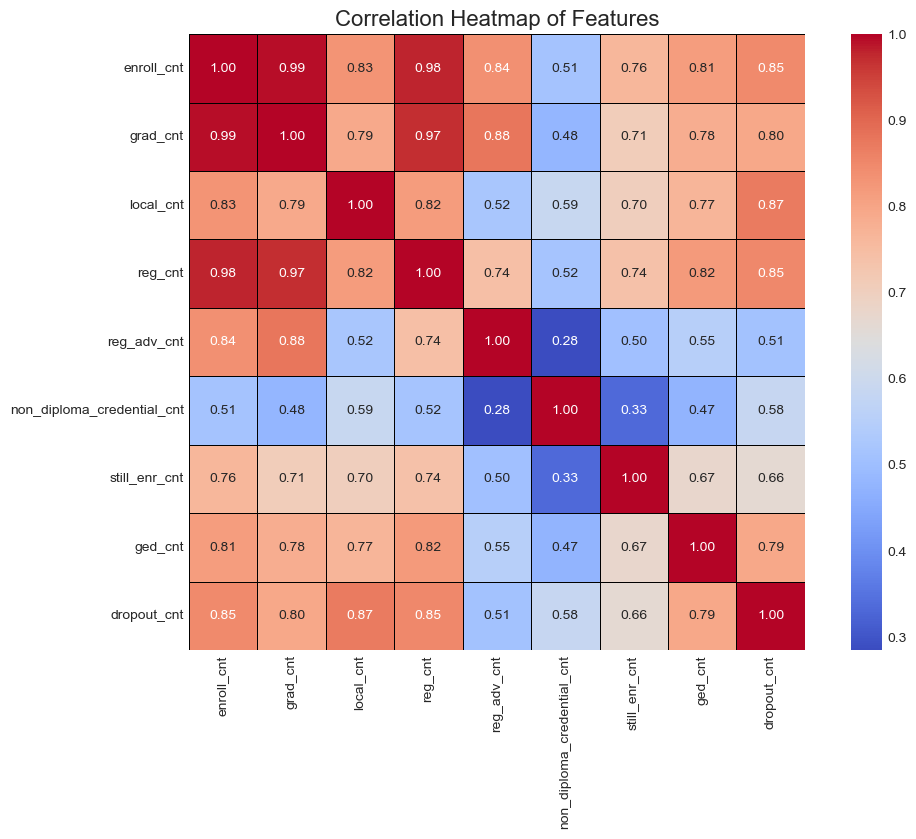

In [182]:
# Create the heatmap with improved formatting
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=0.5, linecolor='black', cbar=True, square=True,
            annot_kws={"size": 10})
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()

### Correlation Heatmap Explanation

- This heatmap displays correlations between various features in the dataset.
- **Color Interpretation**:
  - **Red shades**: High positive correlation (closer to 1).
  - **Blue shades**: Low or negative correlation (closer to 0 or negative).

- **Key Insights**:
  - **enroll_cnt** and **grad_cnt** have a strong positive correlation (0.99), indicating that higher enrollment leads to more graduations.
  - **non_diploma_credential_cnt** has low correlations, particularly with **reg_adv_cnt** (0.28), showing a weak or no linear relationship.
  - Features like **local_cnt**, **dropout_cnt**, and **ged_cnt** show moderate to strong correlations with others, indicating their influence on the dataset.


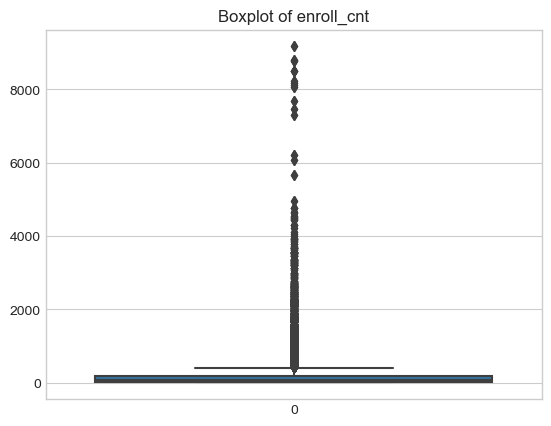

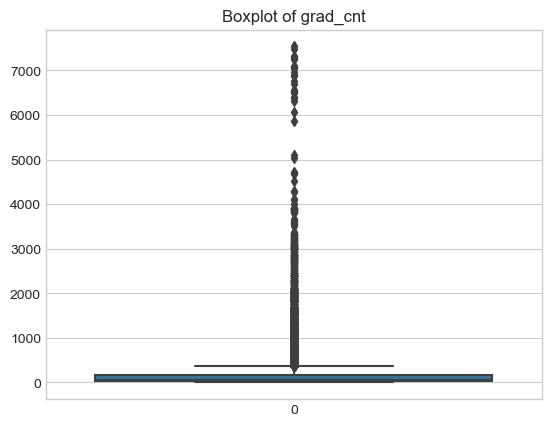

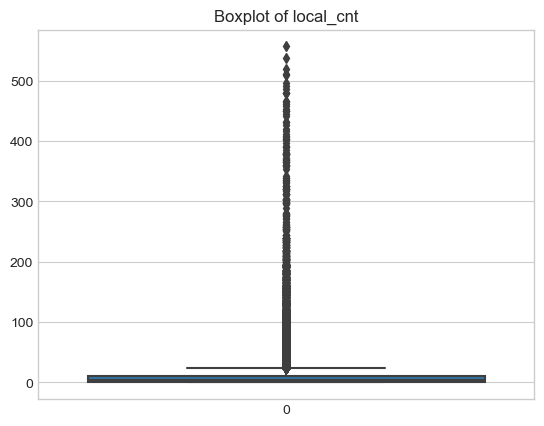

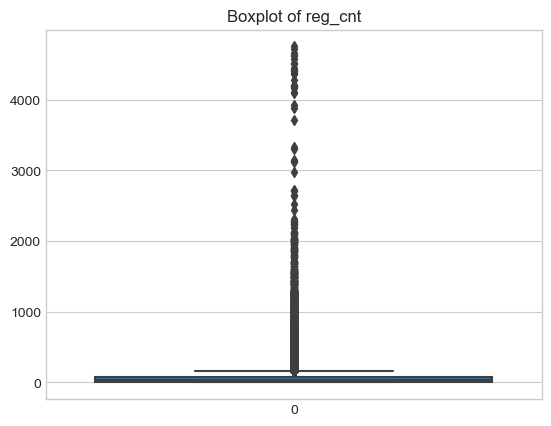

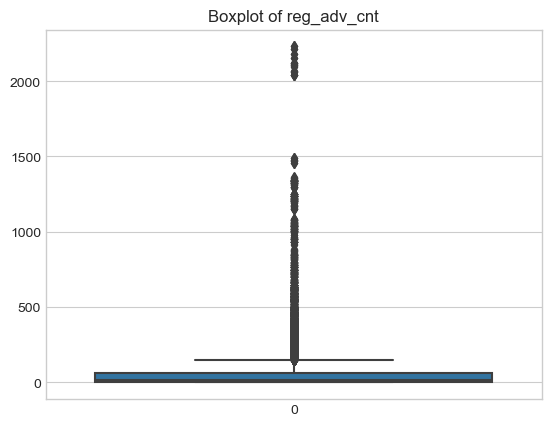

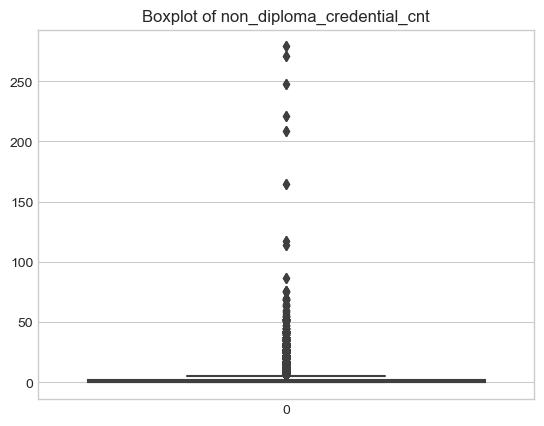

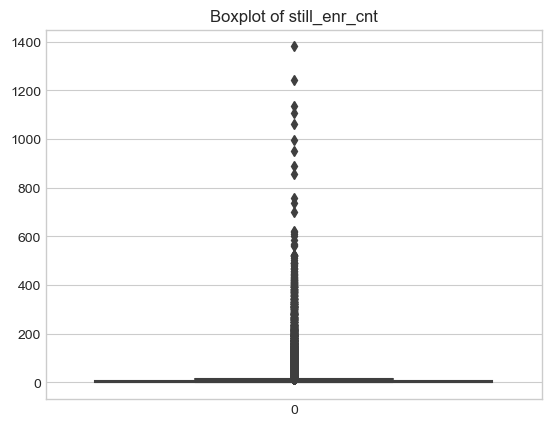

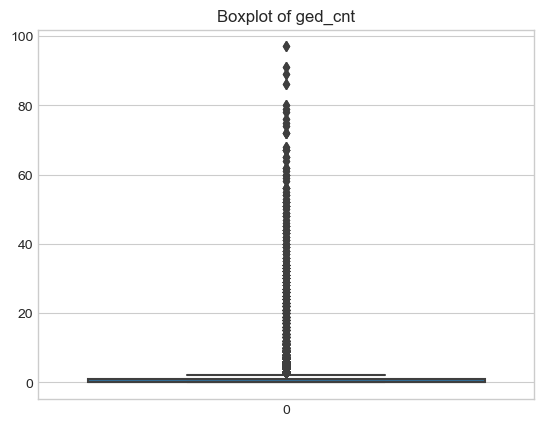

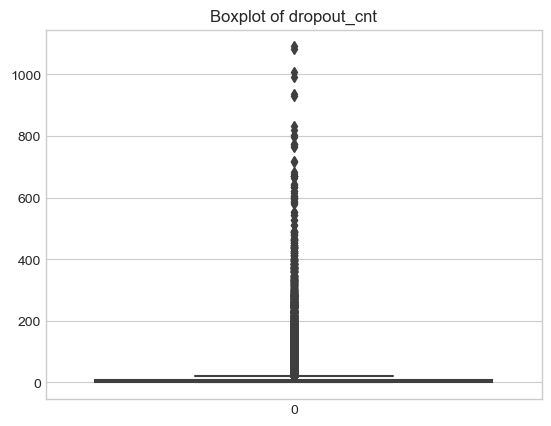

In [183]:
# Plot boxplots for specified numerical columns to visualize their distributions
for i in ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']:
  sns.boxplot(df[i])
  plt.title(f'Boxplot of {i}')
  print('\n')
  plt.show();

#### Insights from Boxplots of Student Enrollment and Outcome Counts

#### 1. Boxplot of `non_diploma_credential_cnt`
- **Most data**: Close to zero.
- **Outliers**: Many outliers extend above 250, indicating significant variation.

#### 2. Boxplot of `reg_adv_cnt`
- **Most data**: Clustered near zero.
- **Outliers**: Numerous outliers above 2000, showing high variation in advanced registrations.

#### 3. Boxplot of `reg_cnt`
- **Most data**: Concentrated near zero.
- **Outliers**: Values exceed 4000, indicating a few institutions with a very high registration count.

#### 4. Boxplot of `local_cnt`
- **Most data**: Near zero.
- **Outliers**: Several values above 500, suggesting a wide variation in local counts.

#### 5. Boxplot of `grad_cnt`
- **Most data**: Close to zero.
- **Outliers**: Extend beyond 7000, indicating some institutions have significantly higher graduate counts.

#### 6.  Boxplot of `enroll_cnt`:

- **Outliers**: A significant number of outliers above the whiskers, showing extreme enrollment counts.
- **Skewness**: The data is heavily skewed due to the extreme outliers.

#### 7.  Boxplot of `dropout_cnt`:
- **Most Data**: Values are concentrated near the lower end.
- **Outliers**: A significant number of extreme dropout counts.
- **Skewness**: Right-skewed distribution.

#### 8.  Boxplot of `ged_cnt`:
- **Most Data**: Values tightly clustered near the bottom.
- **Outliers**: Several extreme `ged_cnt` values.
- **Skewness**: Right-skewed due to the presence of outliers.

#### 9.  Boxplot of `still_enr_cnt`:
- **Most Data**: Values are concentrated near the lower end.
- **Outliers**: A significant number of extreme dropout counts.
- **Skewness**: Right-skewed distribution.

#### Overall Insight
- All plots show **skewed distributions** with the majority of data near zero and numerous **high-value outliers** across all categories.

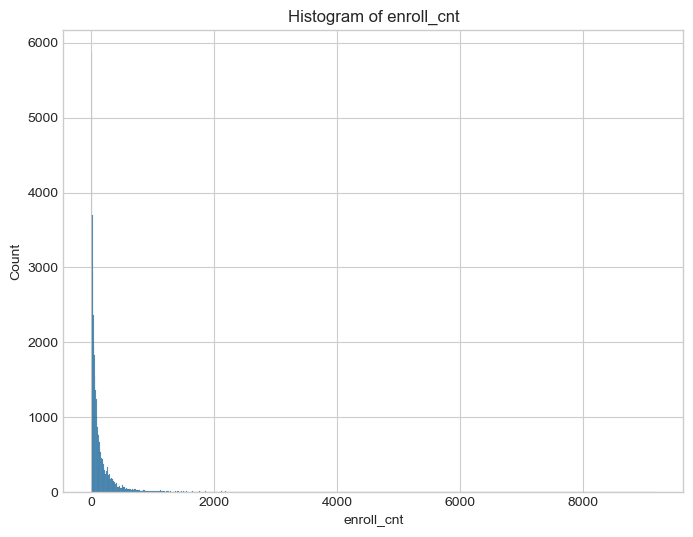

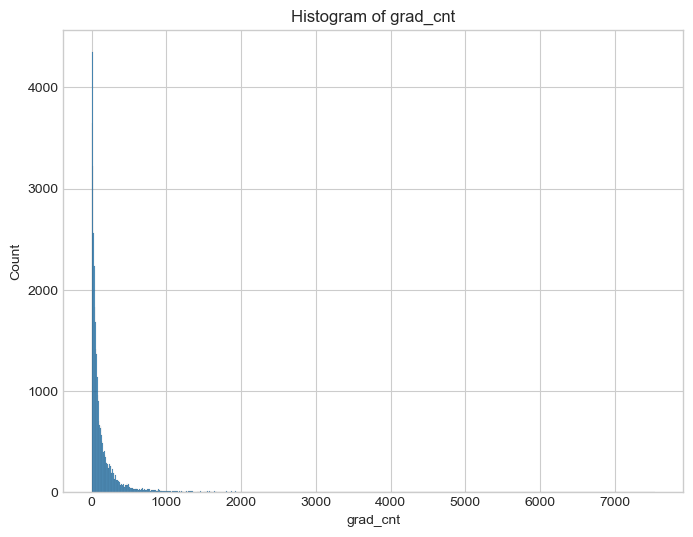

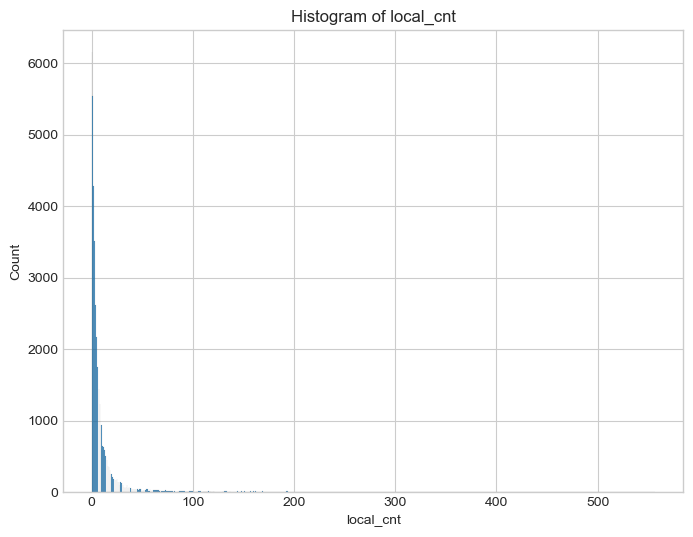

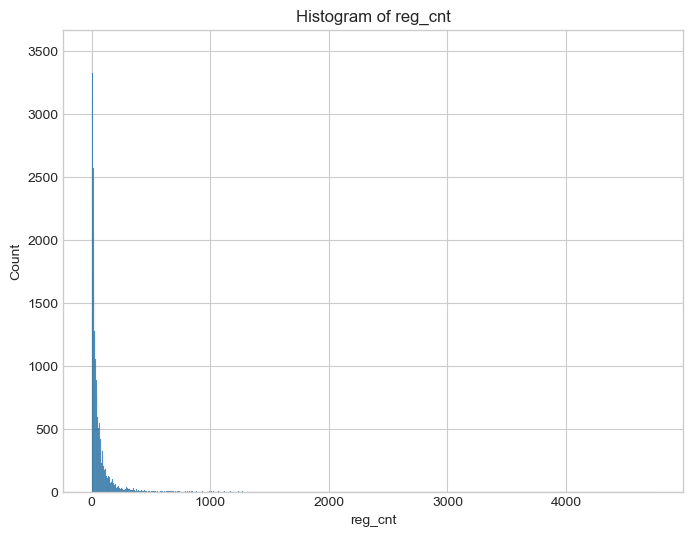

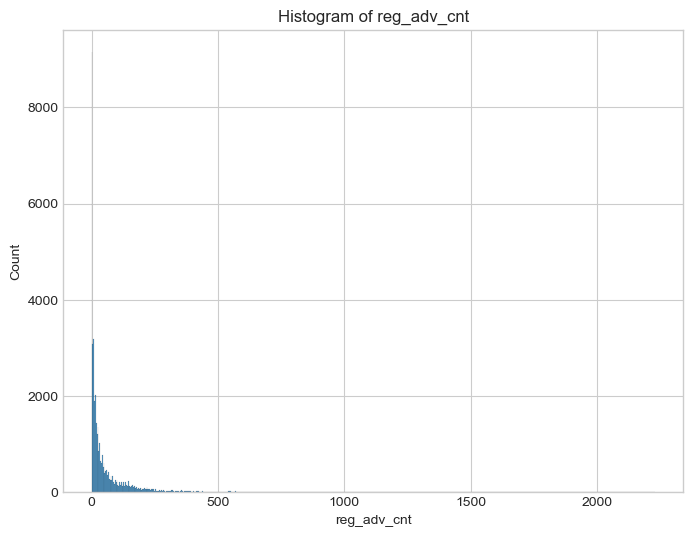

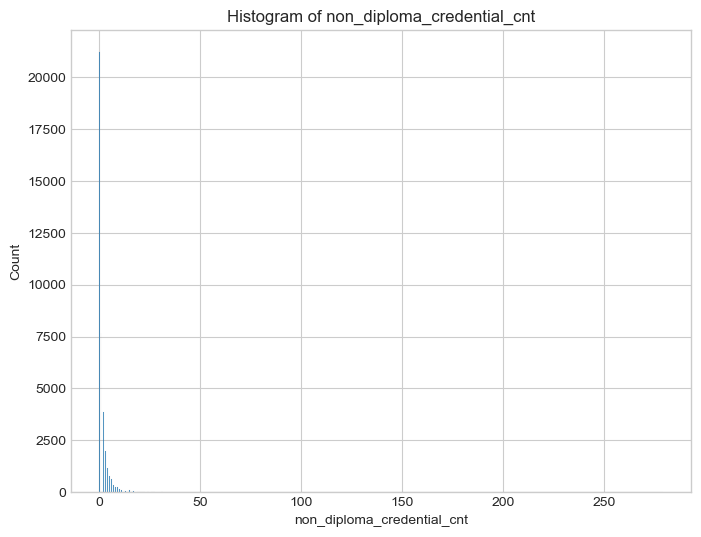

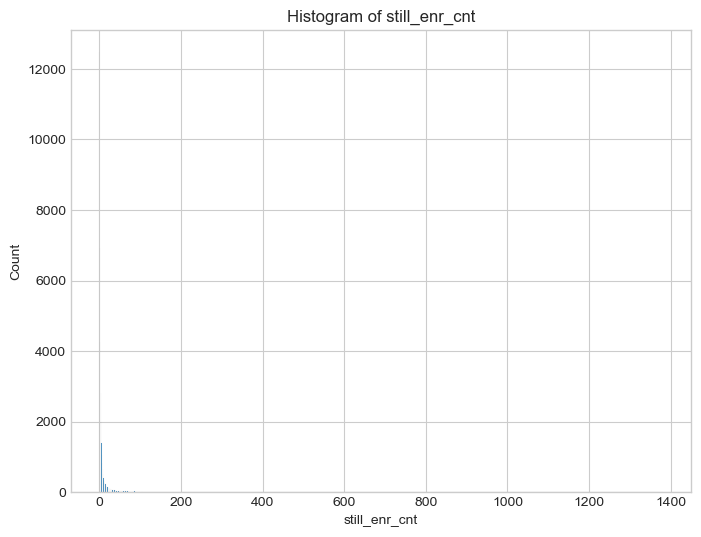

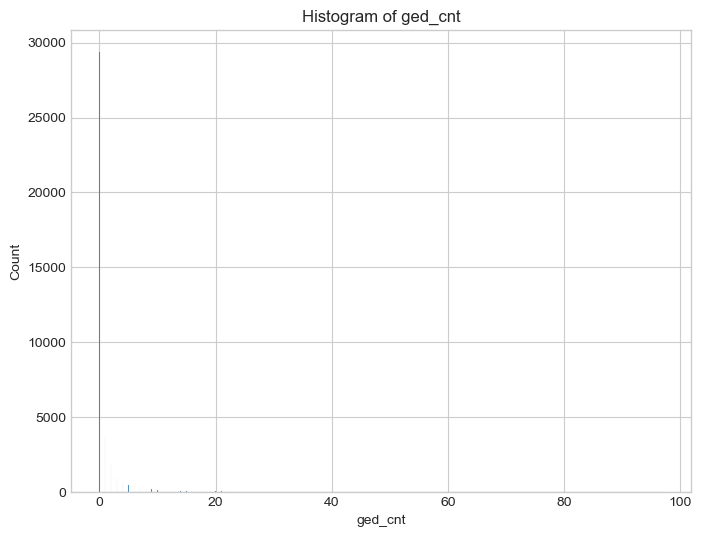

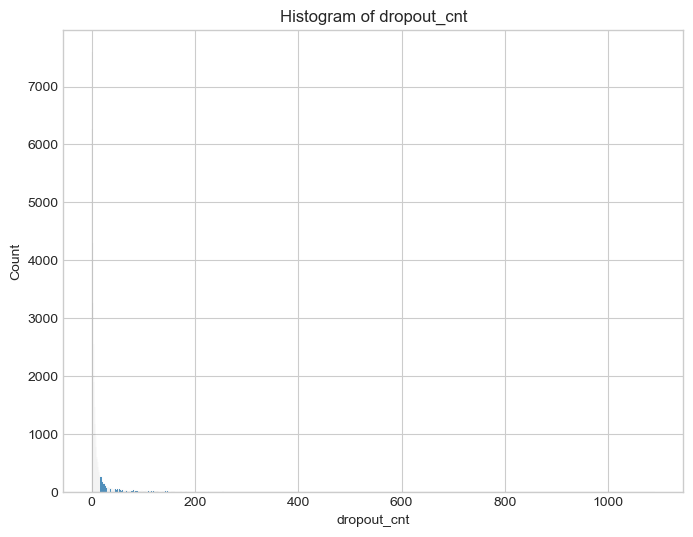

In [184]:
# Plot histograms for specified numerical columns to visualize their distributions
for i in ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[i])
  plt.title(f'Histogram of {i}')
  print('\n')
  plt.show();

### Generalized Explanation

The histogram shows a **right-skewed distribution** with most values concentrated at lower ranges and a long tail indicating fewer high values. This pattern suggests **many small values** and **a few outliers** with larger values.

#### Log Transformation (1st Method)

In [185]:
df1 = df.copy()

In [186]:
lognum_col = []
for i in ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt']:
  df1[f'log_{i}'] = np.log1p(df1[i])
  lognum_col.append(f'log_{i}')

In [187]:
df1.drop(['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt','reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt','dropout_cnt'], axis=1, inplace=True)

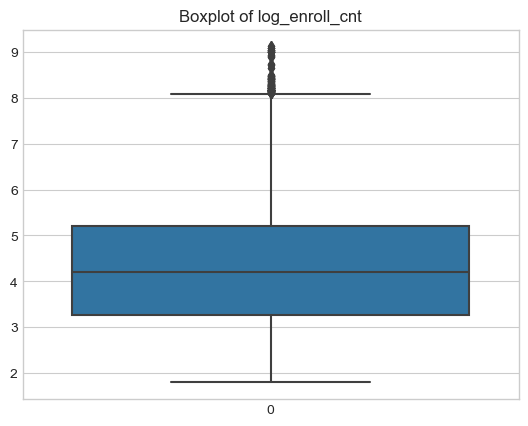

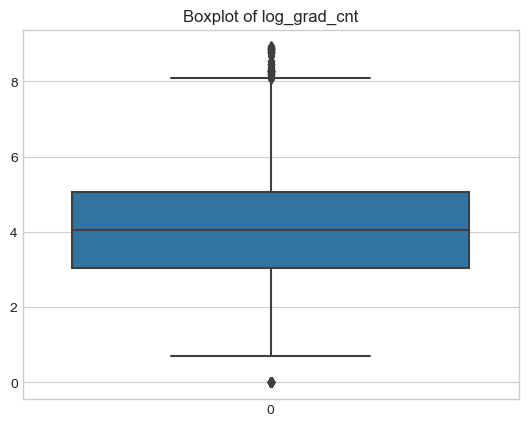

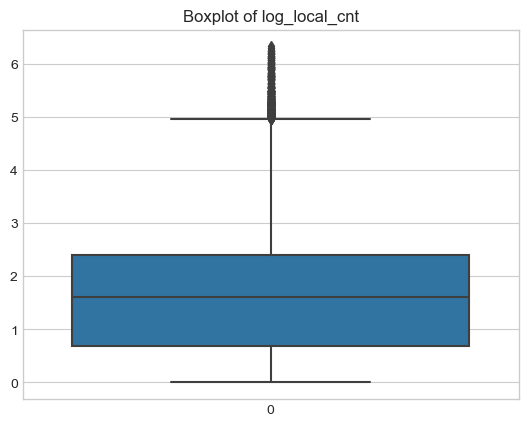

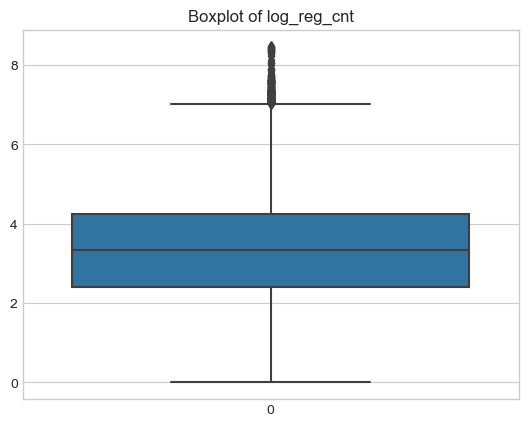

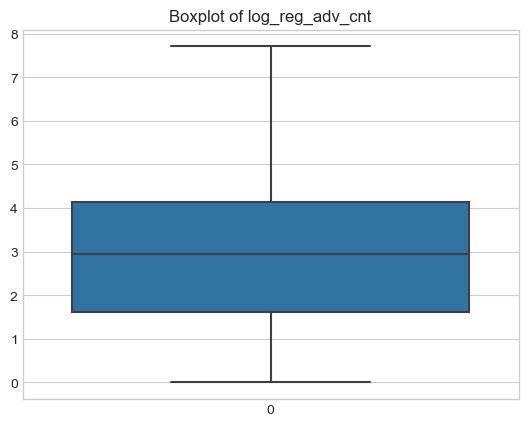

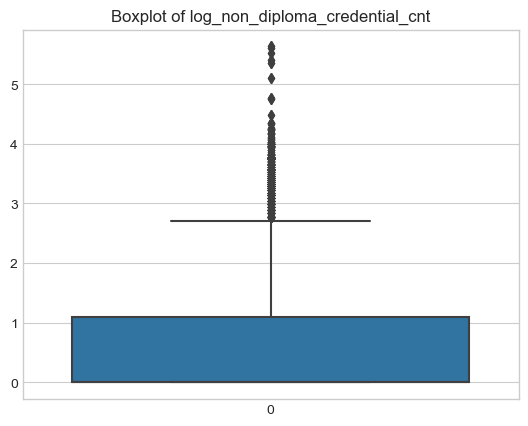

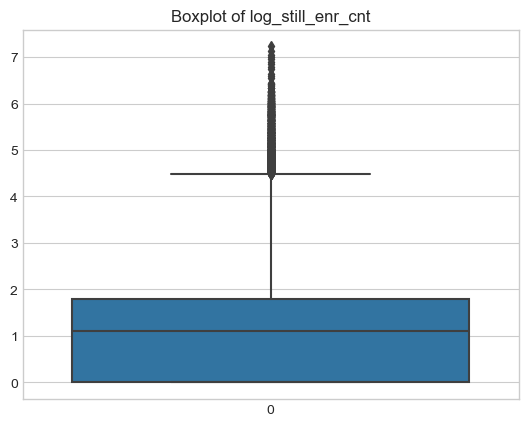

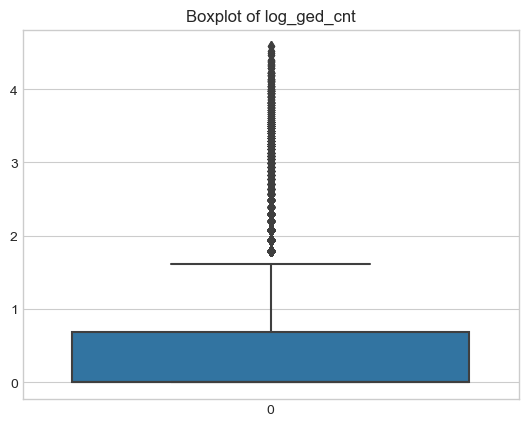

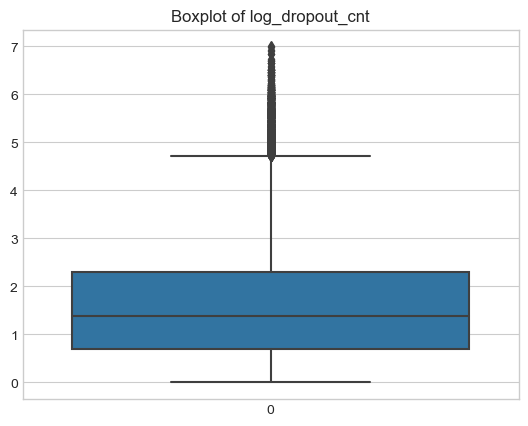

In [188]:
for i in lognum_col:
  sns.boxplot(df1[i])
  plt.title(f'Boxplot of {i}')
  print('\n')
  plt.show();

### Prepped Data Review

#### Box Plot After Log Transformation

After applying the **log transformation**, the box plot now shows a more **balanced distribution** of the data. The transformation reduces the impact of extreme outliers and compresses the range of larger values, allowing the middle 50% of the data (the interquartile range) to be more **clearly visible**. This provides a more **accurate representation** of the spread and central tendency of the data, making it easier to analyze and compare.

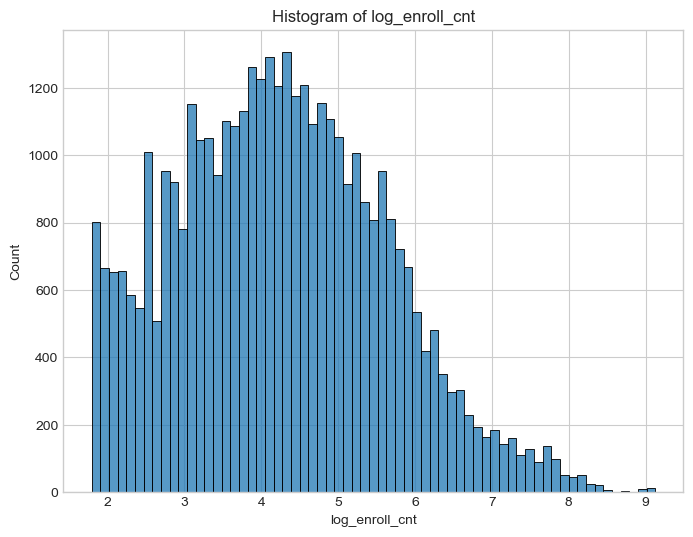

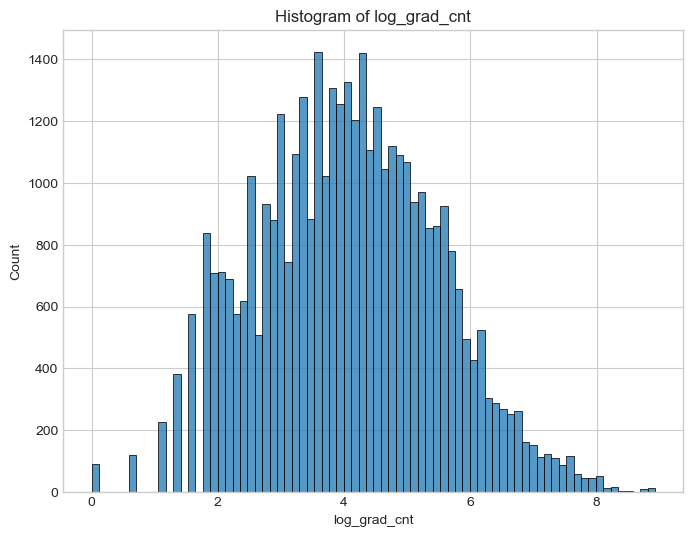

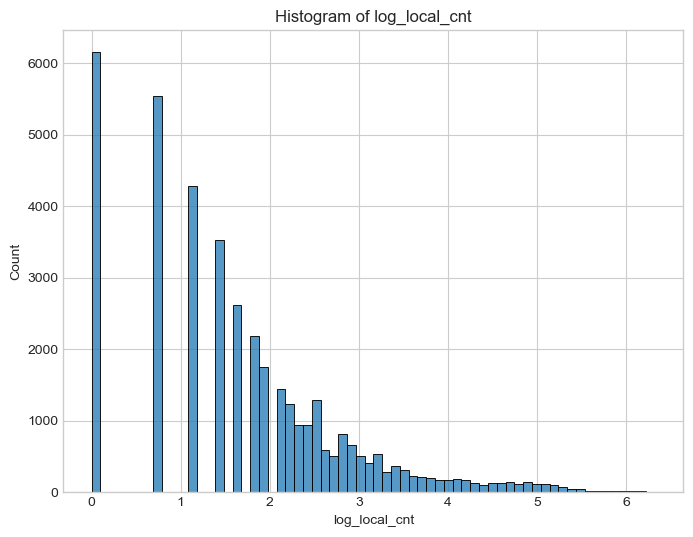

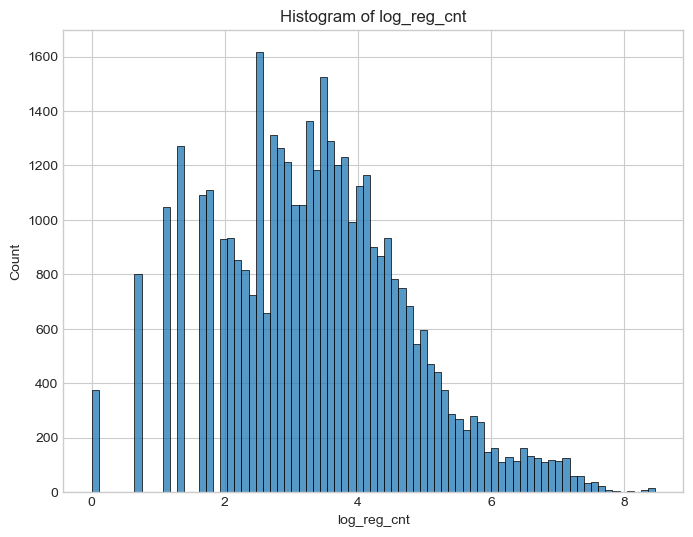

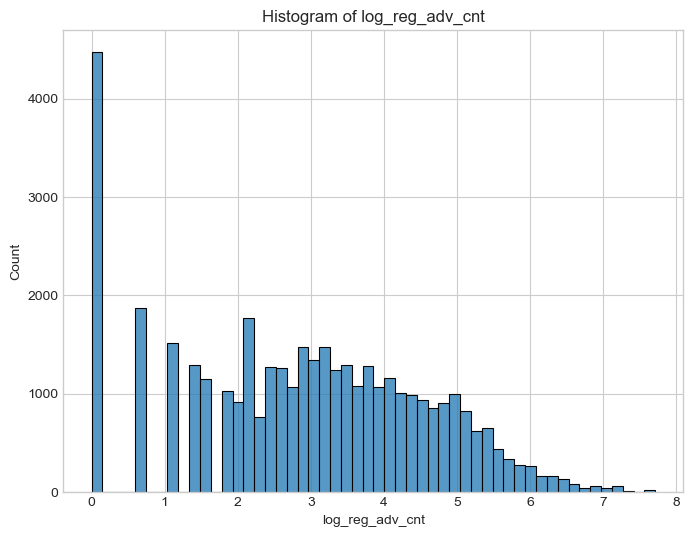

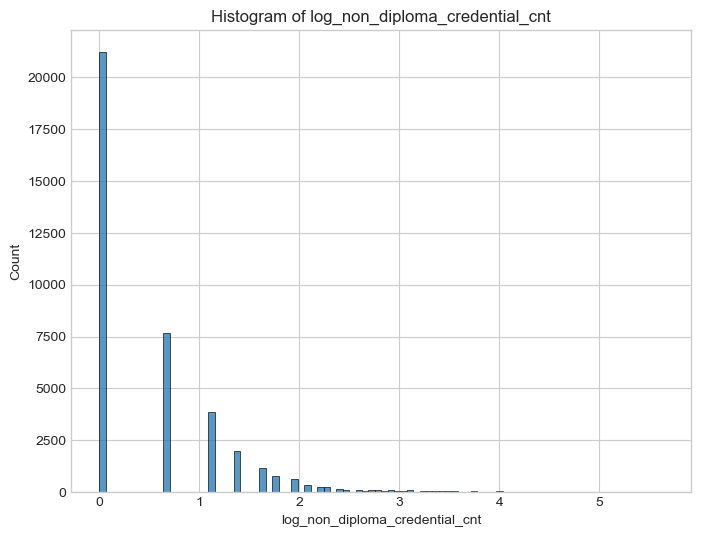

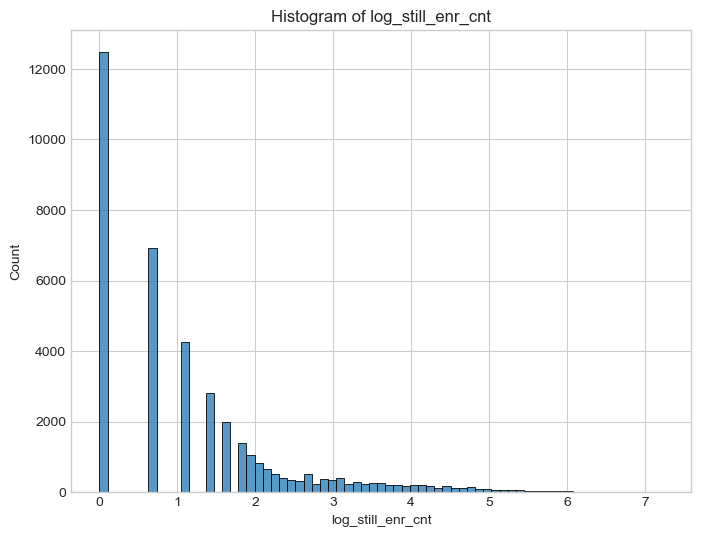

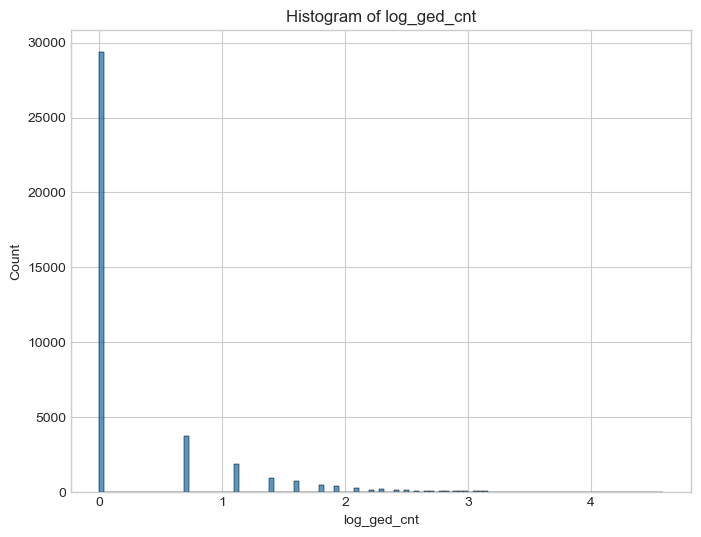

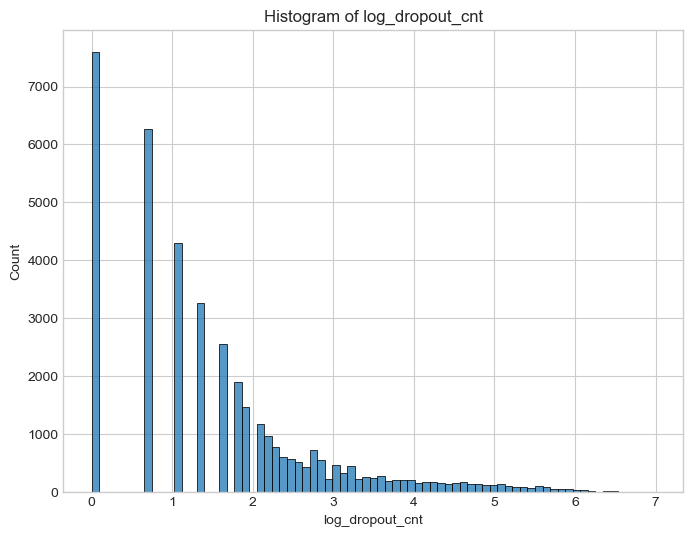

In [189]:
for i in lognum_col:
  plt.figure(figsize=(8, 6))
  sns.histplot(df1[i])
  plt.title(f'Histogram of {i}')
  print('\n')
  plt.show();

#### Generalized Explanation

To address the skewness, we applied a **log transformation**. The log transformation compresses the range of large values, reduces the impact of extreme outliers, and makes the distribution more **normally distributed**. This normalization improves the interpretability and suitability of the data for further analysis, especially for models that assume a normal distribution.

#### StandardScaler (2nd method)

In [190]:
# Create a copy of the DataFrame to avoid modifying the original data
df2 = df.copy()

In [191]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [192]:
# Generate a list of standard deviation column names
std_cols = []
for i in num_col:
  std_cols.append(f'std_{i}')

In [193]:
df_std = pd.DataFrame(scaler.fit_transform(df2[num_col]), columns=std_cols)

In [194]:
df2.reset_index(drop=True, inplace=True)
df2 = pd.concat([df2, df_std], axis=1)
df2.drop(num_col, axis=1, inplace=True)

In [195]:
df2.head()

,AMSTERDAM CITY SCHOOL DISTRICT,BINGHAMTON CITY SCHOOL DISTRICT,BUFFALO CITY SCHOOL DISTRICT,DUNKIRK CITY SCHOOL DISTRICT,EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VALLEY),ELIZABETHTOWN-LEWIS CENTRAL SCHOOL DISTRICT,ELMIRA CITY SCHOOL DISTRICT,FALLSBURG CENTRAL SCHOOL DISTRICT,GEORGE JUNIOR REPUBLIC UNION FREE SCHOOL DISTRICT,GLOVERSVILLE CITY SCHOOL DISTRICT,...,Students with Disabilities,std_enroll_cnt,std_grad_cnt,std_local_cnt,std_reg_cnt,std_reg_adv_cnt,std_non_diploma_credential_cnt,std_still_enr_cnt,std_ged_cnt,std_dropout_cnt
0,0,0,0,0,0,0,0,0,0,0,...,0,1.058898,0.838167,1.580829,0.988495,0.218166,2.165853,0.458726,-0.278336,2.628424
1,0,0,0,0,0,0,0,0,0,0,...,0,0.299750,0.234774,0.551056,0.364029,-0.113219,0.011620,-0.007347,-0.278336,0.972702
2,0,0,0,0,0,0,0,0,0,0,...,0,0.322479,0.157274,0.644672,0.240022,-0.135813,1.858106,0.188894,-0.278336,1.331774
3,0,0,0,0,0,0,0,0,0,0,...,0,0.397484,0.240310,0.925519,0.426033,-0.293974,1.242610,0.164364,-0.278336,1.491362
4,0,0,0,0,0,0,0,0,0,0,...,0,-0.213925,-0.285583,0.020567,-0.207290,-0.429540,0.319367,-0.080938,-0.278336,0.234609


In [196]:
df2[std_cols].describe()

,std_enroll_cnt,std_grad_cnt,std_local_cnt,std_reg_cnt,std_reg_adv_cnt,std_non_diploma_credential_cnt,std_still_enr_cnt,std_ged_cnt,std_dropout_cnt
count,3.967400e+04,3.967400e+04,3.967400e+04,3.967400e+04,39674.000000,3.967400e+04,3.967400e+04,3.967400e+04,3.967400e+04
mean,-2.292420e-17,1.719315e-17,1.719315e-17,-1.719315e-17,0.000000,1.146210e-17,5.731050e-18,1.146210e-17,1.146210e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-4.253049e-01,-4.461188e-01,-3.851009e-01,-3.844438e-01,-0.467198,-2.961278e-01,-2.771788e-01,-2.783363e-01,-3.239474e-01
25%,-3.798469e-01,-3.907616e-01,-3.538956e-01,-3.401554e-01,-0.437072,-2.961278e-01,-2.771788e-01,-2.783363e-01,-3.039989e-01
50%,-2.866581e-01,-2.883509e-01,-2.602799e-01,-2.648652e-01,-0.331631,-2.961278e-01,-2.281185e-01,-2.783363e-01,-2.641020e-01
75%,-2.982060e-02,-1.433295e-02,-7.304846e-02,-7.885413e-02,-0.000247,1.161985e-02,-1.545281e-01,-7.628860e-02,-1.444113e-01
max,2.041944e+01,2.042353e+01,1.699622e+01,2.066138e+01,16.335513,4.263467e+01,3.359896e+01,1.932029e+01,2.143981e+01


In [197]:
df2[std_cols] = df2[std_cols]+10

#### VIF and PCA on Log Scaled

#### Variance Inflation Factor (VIF)
##### Why Perform VIF (Variance Inflation Factor) Analysis?

- **Multicollinearity Detection**: VIF is used to detect multicollinearity among independent variables in a regression model. High multicollinearity can inflate standard errors, making it harder to determine the significance of each predictor. VIF is one of the filtration methods used for feature selection.

Here we are calculating the VIF for each feature:


In [198]:
df1.columns

Index(['AMSTERDAM CITY SCHOOL DISTRICT', 'BINGHAMTON CITY SCHOOL DISTRICT',
       'BUFFALO CITY SCHOOL DISTRICT', 'DUNKIRK CITY SCHOOL DISTRICT',
       'EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VALLEY)',
       'ELIZABETHTOWN-LEWIS CENTRAL SCHOOL DISTRICT',
       'ELMIRA CITY SCHOOL DISTRICT', 'FALLSBURG CENTRAL SCHOOL DISTRICT',
       'GEORGE JUNIOR REPUBLIC UNION FREE SCHOOL DISTRICT',
       'GLOVERSVILLE CITY SCHOOL DISTRICT',
       'GREENBURGH ELEVEN UNION FREE SCHOOL DISTRICT',
       'GREENPORT UNION FREE SCHOOL DISTRICT',
       'HAWTHORNE-CEDAR KNOLLS UNION FREE SCHOOL DISTRICT',
       'HEMPSTEAD UNION FREE SCHOOL DISTRICT',
       'KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT',
       'LACKAWANNA CITY SCHOOL DISTRICT', 'LIBERTY CENTRAL SCHOOL DISTRICT',
       'MOUNT PLEASANT-COTTAGE UNION FREE SCHOOL DISTRICT',
       'NEW YORK CITY GEOGRAPHIC DISTRICT # 8',
       'NEW YORK CITY GEOGRAPHIC DISTRICT #12',
       'NEW YORK CITY GEOGRAPHIC DISTRICT #23',
       'NIA

In [199]:
df1.reset_index(drop=True, inplace=True)

In [200]:
X = df1.drop('log_dropout_cnt', axis = 1)
y = df1.log_dropout_cnt

In [201]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                              Feature        VIF
0                      AMSTERDAM CITY SCHOOL DISTRICT   2.361322
1                     BINGHAMTON CITY SCHOOL DISTRICT   2.007946
2                        BUFFALO CITY SCHOOL DISTRICT   3.191928
3                        DUNKIRK CITY SCHOOL DISTRICT   1.791088
4   EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VA...   2.005452
..                                                ...        ...
69                                        log_reg_cnt  19.515186
70                                    log_reg_adv_cnt   8.678692
71                     log_non_diploma_credential_cnt   2.076896
72                                  log_still_enr_cnt   5.093438
73                                        log_ged_cnt   2.247338

[74 rows x 2 columns]


In [202]:
# Drop features with very high VIF (>10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
df_reduced = X.drop(columns=high_vif_features)

#### Insights:
- **Thresholds for VIF**:
  - VIF values:
    - **1**: No correlation.
    - **1-10**: Moderate multicollinearity.
    - **>10**: High multicollinearity requiring attention.
  
- **Key Observations**:
  - **High VIF**:
    - Features like `Other_aggregation_name`, `NYC', 'Other_nrc_desc`,
       `Urban-Suburban High Needs`, `DUTCHESS`, `OSWEGO`,
       `Other_county_name`, `SCHENECTADY`, `SULLIVAN`, `ULSTER`,
       `WASHINGTON` `Economically Disadvantaged`, `Other_subgroup_name`,
       `Students with Disabilities`, `log_enroll_cnt`, `log_grad_cnt`and
       `log_reg_cnt` have VIF values far exceeding **10**, indicating severe multicollinearity. These features may be redundant.
  - **Moderate VIF**:
    - Around `57` columns suggest some degree of multicollinearity but are less critical than those with extremely high values.

  
- **Impact on Model**:
  - High multicollinearity could inflate the variance of coefficients, making the model less reliable and potentially causing overfitting.

### Principal Component Analysis (PCA)

In this analysis, we utilized Principal Component Analysis (PCA) to reduce the dimensionality of our dataset while retaining a significant portion of its variance.

After selecting 57 columns using VIF that are more likely to predict the target variable, we then performed PCA to reduce the dimensionality of the data frame.


As a standard practice, we have set the number of components to achieve a variance explanation of 95%. This means that the PCA components we derive will account for 95% of the total variance.

In [203]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(df_reduced)

# Output the number of components retained
print(f'Original number of features: {df_reduced.shape[1]}')
print(f'Number of PCA components: {X_pca.shape[1]}')

print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f'Total variance explained by selected components: {sum(pca.explained_variance_ratio_)}')

Original number of features: 57
Number of PCA components: 9
[0.53776232 0.21268499 0.06622595 0.03919664 0.03185636 0.02052357
 0.02044608 0.02024226 0.01516468]
Total variance explained by selected components: 0.9641028442250579


#### Transformation of selected features into Principal Components

We transformed the selected features into principal components, which represent the most critical information from the original feature set. This transformation not only simplifies our dataset but also helps mitigate issues related to multicollinearity and overfitting.

After applying PCA, we constructed a new DataFrame, df_pca, containing the principal components, and combined it with the remaining features in df_gp2 that were not selected for PCA.

The resulting dataset, new_df, serves as our final feature set, with X representing the independent variables and y representing the target variable, shares.

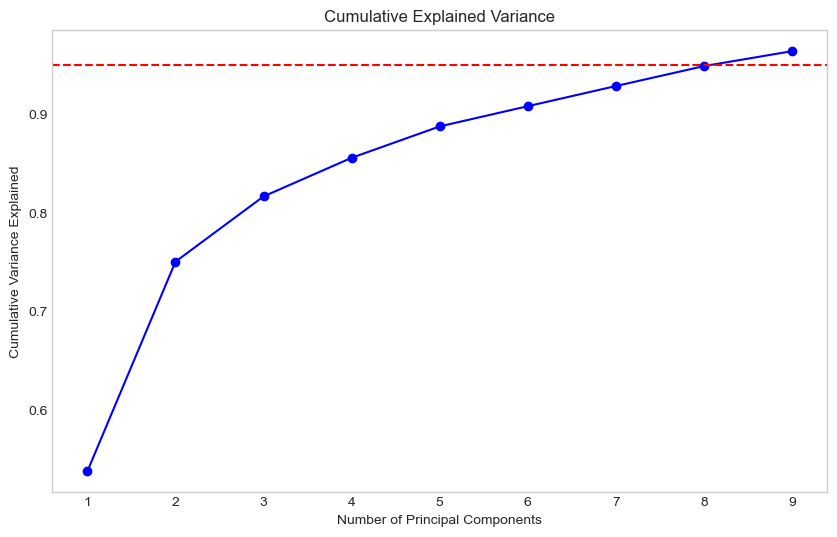

In [204]:
# Plot the cumulative explained variance to visualize the contribution of principal components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line for 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

#### Cumulative Explained Variance

##### Key Observations:

1. **Explained Variance**:
   - The graph shows the cumulative variance explained by increasing the number of principal components.
   - The curve gradually levels off, indicating diminishing returns in variance explained as more components are added.

2. **Explained Variance Threshold**:
   - The red dashed line indicates a common threshold used to select the number of components.
   - The point where the curve meets this line represents the number of principal components needed to explain 95% of the variance.

3. **Optimal Number of Components**:
   - Based on the graph, around **9 components** explain roughly **95% of the variance**.
   - Beyond this point, adding more components does not significantly increase the explained variance, suggesting that these 9 components capture most of the variability in the data.


In [205]:
pca = PCA(n_components=9)  # Specify the number of components again if you want
X_pca = pca.fit_transform(df_reduced)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

#### Dimnesionality Reduction:
- Selecting **9 principal components** strikes a balance between dimensionality reduction and information retention.
- Adding more components beyond this point offers diminishing returns in terms of explained variance.

In [206]:
# Creating function to evaluate the model performance on test data like MSE, RMSE, MAE and R-square.
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
def evaluate_model(model_name, y_true, y_pred):
    """
    Function to compute evaluation metrics for a model.
    Args:
    - model_name (str): The name of the model (e.g., 'Poisson Regression', 'Linear Regression')
    - y_true (array-like): Actual target values
    - y_pred (array-like): Predicted target values by the model
    """
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_true, y_pred)

    # Display results
    print(f"{model_name} Evaluation:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared (R²): {r2:.4f}")
    print("\n" + "-" * 40)

# Ensure that predictions are made for all models


In [207]:
# Splitting the data into independent(X) variables and adding constant to it
X = df_pca
X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)
y = df1.log_dropout_cnt

In [208]:
# Using sklearn's Train Test function to split data into training and testing into 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Poissons Model on Log transformed data

##### Poissons Regression
We use **Poissons Regression** after PCA to leverage the reduced feature set, which retains the most informative aspects of the data while eliminating noise. This helps the model capture complex relationships more effectively and improves stability and generalization. Additionally, the reduced dimensionality allows for faster training and prediction. Overall, this combination enhances model performance while simplifying the workflow.

In [209]:
# Fit the Poisson model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Summary of the Poisson model
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        log_dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29745
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -38700.
Date:                Sun, 13 Oct 2024   Deviance:                       18253.
Time:                        19:55:12   Pearson chi2:                 1.40e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4607
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3073      0.005     58.934      0.0

In [210]:
# Assuming poisson_model is your fitted Poisson regression model
y_pred_poisson = poisson_model.predict(X_test)
evaluate_model("Poisson Regression", y_test, y_pred_poisson)


Poisson Regression Evaluation:
  Mean Squared Error (MSE): 0.6699
  Root Mean Squared Error (RMSE): 0.8185
  Mean Absolute Error (MAE): 0.6589
  R-squared (R²): 0.6186

----------------------------------------


#### Poisson's Model Result:
**Training Data**: we got Pseudo R-squared result as 0.4607 which can be considered to good for Poissons regression.\
**Testing Data** The RMSE value is 0.8185 and R-squared value is 0.6186
- By considering above results for Poissons regression for Log transformed data, we con consider this as good model.
- We can improve this model furter by removing those columns that have high p value

#### Negative Binomial model on Log transformed data

##### Negative Binomial
We use **Negative Binomial** after PCA to leverage the reduced feature set, which retains the most informative aspects of the data while eliminating noise. This helps the model capture complex relationships more effectively and improves stability and generalization. Additionally, the reduced dimensionality allows for faster training and prediction. Overall, this combination enhances model performance while simplifying the workflow.

In [211]:
# Fit the Negative Binomial model
nb_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

# Summary of the Negative Binomial model
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        log_dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29745
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -48123.
Date:                Sun, 13 Oct 2024   Deviance:                       10248.
Time:                        19:55:12   Pearson chi2:                 6.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.2054
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2884      0.008     36.550      0.0

In [212]:
# Assuming neg_binom_model is your fitted Negative Binomial regression model
y_pred_neg_binom = nb_model.predict(X_test)
evaluate_model("Negative Binomial Regression", y_test, y_pred_neg_binom)

Negative Binomial Regression Evaluation:
  Mean Squared Error (MSE): 0.8656
  Root Mean Squared Error (RMSE): 0.9304
  Mean Absolute Error (MAE): 0.6921
  R-squared (R²): 0.5071

----------------------------------------


### Negative Binomial model Result:
**Training Data**: we got Pseudo R-squared result as 0.2054 which can be considered to good for Negative Binomial model.\
**Testing Data** The RMSE value is 0.9304 and R-squared value is 0.5071
- By considering above results for Negative Binomial for Log transformed data, we con consider not a good model compared to Poisson's Regression.
- We can improve this model furter by removing those columns that have high p value

#### Poly fit Multilinear Regression on Log Transformed data
Here, we have adjusted the polynomial degree of 2 based on our data.

In [213]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)  # Transform X into polynomial features

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Make predictions
y_pred = model.predict(X_poly)


# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average CV R-squared Score: {np.mean(cv_scores)}")

Cross-Validation R-squared Scores: [0.71771869 0.72475226 0.72226025 0.72577301 0.71607622]
Average CV R-squared Score: 0.7213160853072906


In [214]:
poly = PolynomialFeatures(degree=2)
X_poly_test = poly.fit_transform(X_test)
y_test_pred = model.predict(X_poly_test)
evaluate_model("Polynomial Regression", y_test, y_test_pred)

Polynomial Regression Evaluation:
  Mean Squared Error (MSE): 0.4997
  Root Mean Squared Error (RMSE): 0.7069
  Mean Absolute Error (MAE): 0.5710
  R-squared (R²): 0.7155

----------------------------------------


##### Poly fit Multilinear Regression Result:
**Training Data**: we got average CV R-squared result as 0.7213 which can be considered to good for Poly fit LR.\
**Testing Data** The RMSE value is 0.7068 and R-squared value is 0.7156
- By considering above results for Poly fit LR for Log transformed data, we con consider this as good model.

#### VIF and PCA on transformed data using Standard Scalar

In [215]:
df2.reset_index(drop=True, inplace=True)

In [216]:
X = df2.drop('std_dropout_cnt', axis = 1)
y = df2.std_dropout_cnt

In [217]:
df2.isnull().sum()

AMSTERDAM CITY SCHOOL DISTRICT                         0
BINGHAMTON CITY SCHOOL DISTRICT                        0
BUFFALO CITY SCHOOL DISTRICT                           0
DUNKIRK CITY SCHOOL DISTRICT                           0
EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VALLEY)    0
                                                      ..
std_reg_adv_cnt                                        0
std_non_diploma_credential_cnt                         0
std_still_enr_cnt                                      0
std_ged_cnt                                            0
std_dropout_cnt                                        0
Length: 75, dtype: int64

In [218]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                                              Feature       VIF
0                      AMSTERDAM CITY SCHOOL DISTRICT  2.358034
1                     BINGHAMTON CITY SCHOOL DISTRICT  2.003112
2                        BUFFALO CITY SCHOOL DISTRICT  3.393101
3                        DUNKIRK CITY SCHOOL DISTRICT  1.785861
4   EAST RAMAPO CENTRAL SCHOOL DISTRICT (SPRING VA...  2.002438
..                                                ...       ...
69                                        std_reg_cnt       inf
70                                    std_reg_adv_cnt       inf
71                     std_non_diploma_credential_cnt  2.099117
72                                  std_still_enr_cnt  7.375226
73                                        std_ged_cnt  5.007190

[74 rows x 2 columns]


In [219]:
len(vif_data[vif_data['VIF'] < 10]['Feature'].unique())

49

In [220]:
# Drop features with very high VIF (>10)
high_vif_features = vif_data[vif_data['VIF'] > 10]['Feature']
df_reduced = X.drop(columns=high_vif_features)

#### Insights:
- **Thresholds for VIF**:
  - VIF values:
    - **1**: No correlation.
    - **1-10**: Moderate multicollinearity.
    - **>10**: High multicollinearity requiring attention.
  
- **Key Observations**:
  - **High VIF**:
    - Features like 'Other_aggregation_name', 'NYC', 'Other_nrc_desc',
       'Urban-Suburban High Needs', 'CHEMUNG', 'DUTCHESS', 'FULTON',
       'MONTGOMERY', 'OSWEGO', 'Other_county_name', 'SCHENECTADY',
       'SENECA', 'SULLIVAN', 'TOMPKINS', 'ULSTER', 'WASHINGTON', 'YATES',
       'Economically Disadvantaged', 'Other_subgroup_name',
       'Students with Disabilities', 'std_enroll_cnt', 'std_grad_cnt',
       'std_local_cnt', 'std_reg_cnt', 'std_reg_adv_cnt' have VIF values far exceeding **10**, indicating severe multicollinearity. These features may be redundant.
  - **Moderate VIF**:
    - Around `49` columns suggest some degree of multicollinearity but are less critical than those with extremely high values.

  
- **Impact on Model**:
  - High multicollinearity could inflate the variance of coefficients, making the model less reliable and potentially causing overfitting.

#### Principal Component Analysis (PCA)

- After selecting 49 columns using VIF that are more likely to predict the target variable, we then performed PCA to reduce the dimensionality of the data frame.

- As a standard practice, we have set the number of components to achieve a variance explanation of 95%. This means that the PCA components we derive will account for 95% of the total variance.

In [221]:
from sklearn.decomposition import PCA
# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(df_reduced)

# Output the number of components retained
print(f'Original number of features: {df_reduced.shape[1]}')
print(f'Number of PCA components: {X_pca.shape[1]}')

print(pca.explained_variance_ratio_)  # Variance explained by each component
print(f'Total variance explained by selected components: {sum(pca.explained_variance_ratio_)}')

Original number of features: 49
Number of PCA components: 9
[0.50892752 0.17790709 0.07925746 0.04266737 0.04245614 0.04199915
 0.03891012 0.01151844 0.00871561]
Total variance explained by selected components: 0.9523589026317294


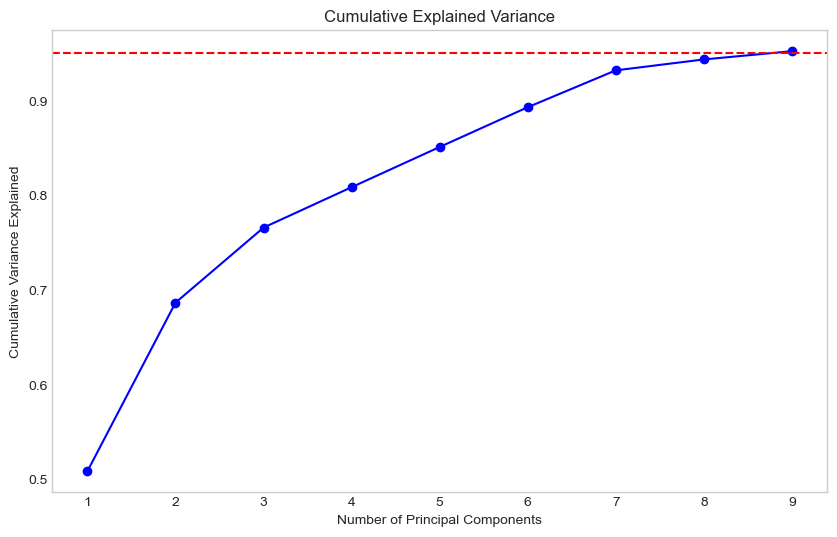

In [222]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='blue')
plt.axhline(y=0.95, color='r', linestyle='--')  # Horizontal line for 95%
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()

#### Cumulative Explained Variance

##### Key Observations:

1. **Explained Variance**:
   - The graph shows the cumulative variance explained by increasing the number of principal components.
   - The curve gradually levels off, indicating diminishing returns in variance explained as more components are added.

2. **Explained Variance Threshold**:
   - The red dashed line indicates a common threshold used to select the number of components.
   - The point where the curve meets this line represents the number of principal components needed to explain 95% of the variance.

3. **Optimal Number of Components**:
   - Based on the graph, around **9 components** explain roughly **95% of the variance**.
   - Beyond this point, adding more components does not significantly increase the explained variance, suggesting that these 9 components capture most of the variability in the data.


In [223]:
pca = PCA(n_components=9)  # Specify the number of components again if you want
X_pca = pca.fit_transform(df_reduced)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

#### Dimnesionality Reduction:
- Selecting **9 principal components** strikes a balance between dimensionality reduction and information retention.
- Adding more components beyond this point offers diminishing returns in terms of explained variance.

In [224]:
# Splitting the data into independent(X) variables and dependent(y) variable
X = df_pca
X = sm.add_constant(X)
X.reset_index(drop=True, inplace=True)
y = df2.std_dropout_cnt

In [225]:
# Using sklearn's Train Test function to split data into training and testing into 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Poissons Model on Transformed Standard Scaled

#### Poissons Regression
We use **Poissons Regression** after PCA to leverage the reduced feature set, which retains the most informative aspects of the data while eliminating noise. This helps the model capture complex relationships more effectively and improves stability and generalization. Additionally, the reduced dimensionality allows for faster training and prediction. Overall, this combination enhances model performance while simplifying the workflow.

In [226]:
# Fit the Poisson model
poisson_model = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Summary of the Poisson model
print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        std_dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29745
Model Family:                 Poisson   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -62158.
Date:                Sun, 13 Oct 2024   Deviance:                       714.90
Time:                        19:55:31   Pearson chi2:                     762.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06132
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3003      0.002   1252.072      0.0

In [227]:
# Assuming poisson_model is your fitted Poisson regression model
y_pred_poisson = poisson_model.predict(X_test)
evaluate_model("Poisson Regression", y_test, y_pred_poisson)

Poisson Regression Evaluation:
  Mean Squared Error (MSE): 0.3102
  Root Mean Squared Error (RMSE): 0.5570
  Mean Absolute Error (MAE): 0.2082
  R-squared (R²): 0.6379

----------------------------------------


#### Poisson's Model Result:
**Training Data**: we got Pseudo R-squared result as 0.0613 which can be considered to good for Poissons regression.\
**Testing Data** The RMSE value is 0.5570 and R-squared value is 0.6379
- By considering above results for Poissons regression for transformed data by standard scaled, we can consider this as an average model.
- We can improve this model furter by removing those columns that have high p value

#### Negative Binomial model on Transformed data by standard scaled



In [228]:
# Fit the Negative Binomial model
nb_model = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()

# Summary of the Negative Binomial model
print(nb_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        std_dropout_cnt   No. Observations:                29755
Model:                            GLM   Df Residuals:                    29745
Model Family:        NegativeBinomial   Df Model:                            9
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -99645.
Date:                Sun, 13 Oct 2024   Deviance:                       49.366
Time:                        19:55:31   Pearson chi2:                     54.6
No. Iterations:                     7   Pseudo R-squ. (CS):           0.005211
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3001      0.006    378.209      0.0

In [229]:
# Assuming neg_binom_model is your fitted Negative Binomial regression model
y_pred_neg_binom = nb_model.predict(X_test)
evaluate_model("Negative Binomial Regression", y_test, y_pred_neg_binom)

Negative Binomial Regression Evaluation:
  Mean Squared Error (MSE): 0.3853
  Root Mean Squared Error (RMSE): 0.6208
  Mean Absolute Error (MAE): 0.2033
  R-squared (R²): 0.5503

----------------------------------------


#### Negative Binomial model Result:
**Training Data**: we got Pseudo R-squared result as 0.0052 which can be considered to good for Negative Binomial model.\
**Testing Data** The RMSE value is 0.6208 and R-squared value is 0.5503
- By considering above results for Negative Binomial for transformed data by Standard Scaled, we can consider this as a below average model.
- We can improve this model furter by removing those columns that have high p value

#### Poly fit Multilinear Regression on Transformed data Standard Scaled.
Here, we have adjusted the polynomial degree of 2 based on our data.

In [230]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)  # Transform X into polynomial features

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y_train)

# Make predictions
y_pred = model.predict(X_poly)


# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_poly, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Average CV R-squared Score: {np.mean(cv_scores)}")

Cross-Validation R-squared Scores: [0.8271472  0.80336873 0.84286232 0.82717575 0.85287419]
Average CV R-squared Score: 0.8306856369618181


In [231]:
poly = PolynomialFeatures(degree=2)
X_poly_test = poly.fit_transform(X_test)
y_test_pred = model.predict(X_poly_test)
evaluate_model("Polynomial Regression", y_test, y_test_pred)

Polynomial Regression Evaluation:
  Mean Squared Error (MSE): 0.1549
  Root Mean Squared Error (RMSE): 0.3936
  Mean Absolute Error (MAE): 0.1686
  R-squared (R²): 0.8192

----------------------------------------


#### Poly fit Multilinear Regression Result:
**Training Data**: we got average CV R-squared result as 0.8306 which can be considered to good for Poly fit LR.\
**Testing Data** The RMSE value is 0.3935 and R-squared value is 0.8192
- By considering above results for Poly fit LR for transformed data by Standard Scaled, we con consider this as the best model.

### Conclusion

We evaluated six models—three based on **log-transformed features** and three based on **standard-scaled features**, using both VIF and PCA for feature selection. The key findings are:

1. **Poisson Regression**:
   - Log-transformed data performed well with a **Pseudo R-squared of 0.4607** and a **testing R-squared of 0.6186**. This model is promising, but could benefit from further refinement, such as removing high p-value variables.
   - Standard-scaled data yielded lower performance, with a **Pseudo R-squared of 0.0613** and a **testing R-squared of 0.6379**, making it an average model.

2. **Negative Binomial Regression**:
   - Both log-transformed and standard-scaled data showed lower predictive power. Log-transformed data had a **Pseudo R-squared of 0.2054** and **testing R-squared of 0.5071**, while the standard-scaled model underperformed with a **Pseudo R-squared of 0.0052** and **testing R-squared of 0.5503**. These models are not ideal and require improvement.

3. **Polynomial Multilinear Regression**:
   - The best overall performance came from the **Polynomial Multilinear Regression** with standard-scaled data, achieving an **average CV R-squared of 0.8306** and **testing R-squared of 0.8192**, making it the most accurate model.
   - The log-transformed version also performed well with a **CV R-squared of 0.7213** and **testing R-squared of 0.7156**, though slightly less effective than the scaled counterpart.

In conclusion, the **Polynomial Regression on standard-scaled data** stands out as the best model. Future improvements can focus on optimizing feature selection, especially for Poisson and Negative Binomial models.